<p style="color:purple; font-size:20px; font-weight:bold">Data Science Immersive - Project 4</p>

**Project summary**

1. Determine the industry factors that are most important in predicting the salary amounts for data science jobs
2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

Goal: Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

<p style="color:purple; font-size:20px; font-weight:bold">Executive Summary of project</p>

**CURRENT PROBLEM No. 1**
1. The company is missing out on the top technology talent

**WHY?**
The salary offer is too low for the best talent

**CURRENT PROBLEM No. 2**
2. The candidates we are interviewing are not ideal

**WHY?**
The job postings do not contain job relevant information

**The objective**
To become more competitive in the hiring market

**HOW?**
1. Investigate what salaries other companies are offering for similar roles

2. Investigate what job description terms other companies are using to describe similar roles

** Approach to scrape data **

Collect the following information (including but not all):

1. Scrape No. 1: Job ID, Title, Salary Estimate, Location, Short Description, Company Name, Company Reviews, Company Rating, URL to job advert<br><br>

2. Scrape No. 2: Job ID, Desired Experience, Experience Level <br><br>

** Scope of data scraped **

Data Scientist jobs in New York, USA from indeed.com.

This was chosen since the job information available for Australian jobs did not included the "Desired Experience" field. By selecting New York, over 2,700 jobs were able to be scraped.

** Summary information about the jobs scraped **

  * Median salary: USD 85,000
  * It appears that different locations have different salary ranges

** Top 10 common terms in different fields**

| Title | Desired Experience | Short Description |
|----|----|----|
| research: 292 | data: 430 | data: 3960 |
| data: 260 | learning: 273 | scientist: 1019 |
| scientist: 186 | java: 143 | health: 633 |
| analyst: 183 | machine: 129 | research: 629|
| manager: 104 | big data: 123 | clinic: 548|
| amp: 89 | hadoop: 118 | team: 508|
| associate: 80 | machine learning: 116 | scientists: 489|
| engineer: 79 | science: 103 | nyu: 463|
| nurse: 74 | spark: 95 | work: 416 |
| practitioner: 74 | mining: 91 | data scientist: 402|

**MODEL TO PREDICT SALARY AMOUNT**

To help our goal to be salary competitive, I created a model that is able to predict market salary using a Linear Regression model.

My model has a score whereby I can explain **73% to 75.5%** variance in salaries based on the summary job information

According to the model, these elements have the biggest impact on salary: appearing in the title: Qualititative, Engineer and Data Scientist.

**MODEL TO PREDICT LOW OR HIGH SALARY**

I have also created a model that is able to predict whether a job should attract a low or high salary (i.e. above or below median salary.  The model was built using a Random Forests modelling technique

I tested my trained Random Forests model and found it was able to correctly predict whether a job would have an above average or below average salary over 91% of the time.

According to the model, the features most important when determining above or below average salary are when:
* Data Sciencist or Health appears in the description
* Machine appears in the desired experience
* Research or Engineer appears in the title

My model shows that you would incorrectly predict a high salary 28 times and incorrectly predict a low salary 25 times.

** To address the bonus question**

I have been able to change some of the levers in the model so that this mix of incorrect predictions changes so that it is more likely to incorrectly predict a low salary job instead of incorrectly predict a high salary job.


**MODEL TO IDENTIFY FACTORS THAT DISTINGUISH: DATA SCIENTIST POSITIONS**

To help the goal to identify factors that distinguish “Data Scientist” positions, I created a model that is able to identify Data Scientist roles. The model was built using a Decision Tree Classifier model using Grid Search Cross Validation.

Using a cross validation technique, my model was able to identify Data Scientist roles over 90% of the time.

According to my model, these features are most important when determining whether a role relates to a Data Scientist:
* Desired Experience terms: Learning big, Spark
* Description term: Research

**MODEL TO IDENTIFY FACTORS THAT DISTINGUISH: ENTRY LEVEL, MID LEVEL, SENIOR LEVEL**

To help the goal to identify factors that distinguish the entry, mid and senior levels, I created a model that is able to identify the associated job level.  The model was created using Chi2 feature selection and K Nearest Neighbours.

Using feature selection, these features are most important when determining the level of a role:
* Title terms: Senior and director
* Salary amounts

**OVERALL OUTCOMES**

* For this given organisation, after they draft their job listing, they can provide the listing it to the data science team and my model can provide a salary estimate (and a below or above average salary indication) for the hiring team to consider.

* I identified the most common terms associated with predicting the job level and my model can be further refined to find the specific terms associated with each level.

<p style="color:orange; font-size:20px; font-weight:bold">Detailed workbook</p>

In [626]:
# Libraries to import

from bs4 import BeautifulSoup
import requests
import re
from datetime import datetime
import pandas as pd
import numpy as np
import math # To round up numbers
import csv
import time

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif

from sklearn.tree import DecisionTreeRegressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import roc_curve, auc

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<p style="color:purple; font-size:16px; font-weight:bold">Business Case Overview</p>

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

Determine the industry factors that are most important in predicting the salary amounts for these data.
Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?
To limit the scope, your principal has suggested that you focus on data-related job postings, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by limiting your search to a single region.

Hint: Aggregators like Indeed.com regularly pool job postings from a variety of markets and industries.

Goal: Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

<p style="color:orange; font-size:20px; font-weight:bold">Part 1: Data scraping</p>

<p style="color:purple; font-size:18px; font-weight:bold">My approach</p>

When visiting Indeed.com I noticed that the format of job listing results is different if the salary is included. Whereby, without salary, no job description is given on the front page, just the "Desired Experience".
![title](img/indeed-exp.png)

When salary is included, the 'Desired Experience' is replaced with the start of the job summary
![title](img/indeed-salary.png)

Also, sometimes the salary is included in the summary:
![title](img/indeed-salary-2.png)

Initial format of job search URL:

| URL start                      | search term    | $     | Salary | syntax | location | radius     |     
|--------------------------------|----------------|-------|--------|--------|----------|------------|
| https://www.indeed.com/jobs?q= | Data+Scientist | +%24+ | 230000 | %2B&l= | New+York | &radius=25 |


The following filters can be applied to search results. As mentioned above, as soon as a salary filter is applied, the "Desired Experience" section disappears from the results. Of the balance of the filters, only "Job Type" (i.e. Full-time, contract, part-time etc) and "Experience Level" cannot be identified from within the search results. For this particular search (Data Scientist in New York), there are 2,790 results. Therefore, 51 do not have a salary tag (2,790 minus 2,379 jobs - per the $40,000+ salary estimate). There are 423 listings which do hot have an "Experience Level" tage (2,790 jobs minus 2,367 - the total of the level tags).
![title](img/indeed-filters.png)

1. My initial thoughts are that the following visible features may be important, so I definitely want the web-scraping to capture these features: "Title", "Company", "Salary Estimate", "Job Type", "Location", "Desired Experience", "Experience Level", "Company reviews", "Company rating" and the short description that is available; plus potentially the text on each individual job page. <br><br>

2. As explained above, since "Salary Estimate" & "Desired Experience" cannot be extracted at the same time, I will perform two separate scrapes and collect a job advert id in order to link the two scrapes together once complete. <br><br>

3. My search of Data Science jobs in New York has yielded 2,790 results, of which 2,605 are Full-Time positions. Since this project / exercise only requires a minimum of 1,000 results, I will only select the Full-Time positions as part of the web scraping. After filtering to Full-Time only results, there remain 2,174 listings with a "Salary Estimate", still sufficiently above the required amount of 1,000 job listings.

![title](img/indeed-salary-filter-full-time.png)

** Scrapes **

Collect the following information (including but not all):

1. Scrape #1: Job ID, Title, Salary Estimate, Location, Short Description, Company Name, Company Reviews, Company Rating, URL to job advert<br><br>

2. Scrape #2: Job ID, Desired Experience, Experience Level <br><br>

** Method **

Scrape #1: Format of job search URL:

| URL start | search term | salary (start) | syntax | salary (end) | syntax | location | type |     
|----|----|----|----|----|----|----|----|
| https://www.indeed.com/jobs?q= | Data+Scientist | %2450000 | +-+ |%2460000 | &l= | New+York |  &jt=fulltime|

example: https://www.indeed.com/jobs?q=Data+Scientist+%2450000+-+%2460000&l=New+York&jt=fulltime <br>
note: %24 before the salary amounts denotes a dollar sign

Scrape #2: Format of job search URL:

| URL start | search term | syntax | location | syntax | experience level |     
|----|----|----|----|----|----|
| https://www.indeed.com/jobs?q= | Data+Scientist | &l= | New+York | &explvl= | mid_level |

example: https://www.indeed.com/jobs?q=data+scientist&l=New+York&explvl=mid_level

** Notes **

The Salary Estimate can be obtained from the search results but for many search results the amount is not listed. It can be inferred from the URL though (i.e. the results which appear based on the estimate entered in the URL) (scrape #1).

The Experience Level will also be inferred from the URL (scrape #2).


As shown in the image below, there are 4 types of ways an entry can be structured (with or without company star reviews and with or without a salary range):
![title](img/indeed-four-types.png)

In [4]:
# Code to inspeact sample URL
testurl = "https://www.indeed.com/jobs?q=Data+Scientist+$170000+-+$180000&l=New+York&radius=25"

In [5]:
# Code to convert URL to Beautiful Soup
s = requests.Session()
r = s.get(testurl, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"})
soup = BeautifulSoup(r.content,"html.parser")

In [6]:
# Code to find the first n-1 results on the page
most_results = soup.find_all('div', class_=" row result")
most_results = str(most_results)
each_result = most_results.split('=" row result"')

In [7]:
# How many results boxes for a page with 10 results?
print(len(each_result))

# However, need to exclude the 1st result. Therefore n-1 results included in this code. The final result is
# captured in a different div container.

10


In [8]:
# Code to review whether each of the different formats above have a different amount of rows when split by 
# "title="

for i in range(1,len(each_result)): # This selects all the containers except the first
    result_split_by_row = each_result[i].split("title=")
    print(len(result_split_by_row)) # To check if there are different amount of rows depending on job ad features

5
4
5
5
4
4
5
5
4


The above result indicates that if reviews are present, an extra row is recorded.

In [9]:
# The following code tests are to review the difference between search results where there are 5 rows and 4 rows
# I note that only the first 3 rows contain relevant information

In [10]:
# Example of result with 5 rows (i.e. Includes company reviews)

row_per_result = each_result[1].split("title=")
print "=== Row 0 ==="
print row_per_result[0]
print "=== Row 1 ==="
print row_per_result[1]
print "=== Row 2 ==="
print row_per_result[2]

=== Row 0 ===
 data-jk="e97514d2cb188db9" data-tn-component="organicJob" id="p_e97514d2cb188db9" itemscope="" itemtype="http://schema.org/JobPosting">\n<h2 class="jobtitle" id="jl_e97514d2cb188db9">\n<a class="turnstileLink" data-tn-element="jobTitle" href="/rc/clk?jk=e97514d2cb188db9&amp;fccid=c46d0116f6e69eae" itemprop="title" onclick="setRefineByCookie(['radius', 'salest']); return rclk(this,jobmap[0],true,0);" onmousedown="return rclk(this,jobmap[0],0);" rel="noopener nofollow" target="_blank" 
=== Row 1 ===
"Senior Data Scientist (VP) - Intelligent Solutions">Senior <b>Data</b> <b>Scientist</b> (VP) - Intelligent Solutions</a>\n</h2>\n<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">\n<span itemprop="name">\n<a href="/cmp/JPMorgan-Chase" onmousedown="this.href = appendParamsOnce(this.href, 'from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=e97514d2cb188db9&amp;jcid=11ba90543b779766')" rel="noopener" target="_blank">\nJP Morgan Ch

In [11]:
# Example of result with 4 rows (i.e. No company reviews)

row_per_result = each_result[2].split("title=")
print "=== Row 0 ==="
print row_per_result[0]
print "=== Row 1 ==="
print row_per_result[1]
print "=== Row 2 ==="
print row_per_result[2]

=== Row 0 ===
 data-jk="3f6d9760d216b2cc" data-tn-component="organicJob" id="p_3f6d9760d216b2cc" itemscope="" itemtype="http://schema.org/JobPosting">\n<h2 class="jobtitle" id="jl_3f6d9760d216b2cc">\n<a class="turnstileLink" data-tn-element="jobTitle" href="/rc/clk?jk=3f6d9760d216b2cc&amp;fccid=3422c3df31e9d571" itemprop="title" onclick="setRefineByCookie(['radius', 'salest']); return rclk(this,jobmap[1],true,0);" onmousedown="return rclk(this,jobmap[1],0);" rel="noopener nofollow" target="_blank" 
=== Row 1 ===
"Senior Data Scientist">Senior <b>Data</b> <b>Scientist</b></a>\n</h2>\n<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">\n<span itemprop="name">\nJefferies &amp; Company, Inc.</span>\n</span>\n\n - <span itemprop="jobLocation" itemscope="" itemtype="http://schema.org/Place"><span class="location" itemprop="address" itemscope="" itemtype="http://schema.org/Postaladdress"><span itemprop="addressLocality">New York, NY</span></span></sp

### Difference between both formats:

Scrape #1: Format of job search URL:

| Feature | Listing **without** reviews | Listing **with** reviews |     
|----|----|----|
| url | row0 | row0 |
| data_id | row0 | row0 |
| title | row1 | row1 |
| company | row1 | row1 |
| location details | row1 | **row2**|
| short description | row1 | **row2**|
| salary info | row1 | **row2**|

## Scrape #1 (main data scrape)

### Script to scrape results from a page (of job posts)

In [21]:
# Function to parse through all of the results on a page

def mainresults(rawurl):
    try:
        # Set url and beautiful soup
        s = requests.Session()
        r = s.get(rawurl, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"})
        soup = BeautifulSoup(r.content,"html.parser")

        # Code to find the first n-1 results on the page
        most_results = soup.find_all('div', class_=" row result")
        most_results = str(most_results)
        each_result = most_results.split('=" row result"')

        # Code to extract salary range from URL - to be used where salary is not explicitly provided

        url_split = rawurl.split("%24")
        url_salary_lower = float(url_split[1].replace("+-+",""))
        end_section = url_split[2].find("&l=New+York&jt=fulltime&filter=0")
        url_salary_upper = float(url_split[2][:end_section])

        def parse_job_into_df(job):

            # Code to select result and assign to its own variable and split into rows
            row_per_result = job
            job_length = len(row_per_result) # Used for future function since there are different job row amounts

            # Code to extract the URL and data_id
            row0 = row_per_result[0]
            url = re.search('href="(.*)" itemprop="title"', row0).group(1)
            url = 'https://www.indeed.com' + url
            data_id = re.search('data-jk="(.*)" data-tn-component="', row0).group(1)
            data_id

            # Code to extract the title

            row1 = row_per_result[1]
            loc = row1.find(">") # Location where title string ends
            title = row1[:loc].replace('"',"")

            # Code to extract the company
            try:
                soup1 = BeautifulSoup(row1, "html.parser")
                try:
                    company = soup1.find('a').text.replace("\\n","") # Code used where the company name is in a hyperlink
                except:
                    company = soup1.find('span', itemprop='name').text.replace("\\n","") # Code for no hyperlink
            
            except: # Code for where there is no company
                company = np.NaN

            #print title, company

            # Run other function to scrape other information

            if job_length == 4:
                row1 = row_per_result[1]
                soup1 = BeautifulSoup(row1, "html.parser")
                soup_num = soup1

            elif job_length == 5:
                row2 = row_per_result[2]
                soup2 = BeautifulSoup(row2, "html.parser")
                soup_num = soup2

            try:
                star = float(soup_num.find('span', class_="rating")['style'].replace("width:","").replace("px",""))
            except:
                star = np.NaN

            try:
                reviews = float(soup2.find('span', class_="slNoUnderline").text.replace(" reviews","").replace(",",""))
            except:
                reviews = np.NaN

            # Code to extract location details
            location = soup_num.find('span', itemprop="addressLocality").text
            if location == "New York State":
                city = "New York"
                state = "NY"
                zipcode = np.NaN
                area = "New York State"
            
            else:
                city = location.split(",")[0]
                state = location.split(",")[1][1:3]
                if location[-2:] != state:
                    zip_plus = location.split(state)
                    zipcode = zip_plus[1][1:6]
                    area = zip_plus[1][7:].replace("(","").replace(")","")
                else:
                    zipcode = np.NaN
                    area = np.NaN
            
            
            # Code to extract short description
            shortdesc = soup_num.find('span', class_="summary").text.replace("\\n","").replace("...","")

            try: # If a salary is available
                salary = soup_num.find('span', class_="no-wrap").text.replace("\\n","")

                if ' a year' in salary: # Code used for annual salaries
                    annual_salary = salary.replace(' a year',"").replace("$","").replace(",","")

                    if " - " in annual_salary: # Code used where there is a salary range
                        salary_split = annual_salary.split(" - ")
                        lower_salary = float(salary_split[0])
                        upper_salary = float(salary_split[1])

                    else: # Code used where there isn't a salary range
                        lower_salary = float(annual_salary)
                        upper_salary = float(annual_salary)

                elif ' an hour' in salary: # Code used for hourly salaries
                    hourly_salary = salary.replace(' an hour',"").replace("$","")
                    if " - " in hourly_salary: # Code used where there is a salary range
                        salary_split = hourly_salary.split(" - ")
                        lower_salary = float(salary_split[0]) * 2080
                        upper_salary = float(salary_split[1]) * 2080
                        # Conversion based on US annual salaries calculated as 2,080 hours per year

                    else: # Code used where there isn't a salary range
                        lower_salary = float(hourly_salary) * 2080
                        upper_salary = float(hourly_salary) * 2080
                        
                elif ' a week' in salary: # Code used for weekly salaries
                    weekly_salary = salary.replace(' a week',"").replace("$","")
                    if " - " in weekly_salary: # Code used where there is a salary range
                        salary_split = weekly_salary.split(" - ")
                        lower_salary = float(salary_split[0]) * 52
                        upper_salary = float(salary_split[1]) * 52
                        # Conversion based on US annual salaries calculated on 52 weeks per year

                    else: # Code used where there isn't a salary range
                        lower_salary = float(weekly_salary) * 52
                        upper_salary = float(weekly_salary) * 52

            except: # If no salary is available
                lower_salary = url_salary_lower
                upper_salary = url_salary_upper

            mid_salary = (lower_salary + upper_salary) / 2

            # Insert information into DataFrame

            df_jobs.loc[len(df_jobs)] = [url, data_id, title, company, lower_salary, upper_salary, mid_salary,
                                         star, reviews, city, state, zipcode, area, shortdesc]

        # Code to scrape main results into dataframe

        for i in range(1,len(each_result)):
            job_ad = each_result[i].split("title=")
            parse_job_into_df(job_ad)

        # Code to scrape final result into dataframe

        last_result = soup.find_all('div', class_="lastRow row result")
        last_result = str(last_result)
        last_result = last_result.split('="lastRow row result"')
        last_job_ad = last_result[1].split("title=")
        parse_job_into_df(last_job_ad)

    except:
        failed_urls.append(rawurl)
        print rawurl # To catch any issues
    

### Create list of URLs to scrape

In [86]:
# Create list of pages to scrape

# Lowest salary is $20K and highest is $300K. Create code to extract job results in $10K increments for this range.
list_nums = np.arange(20000,300000,10000)

url_list = []
page_counts = []

for salary in list_nums:
    initial_url = 'https://www.indeed.com/jobs?q=Data+Scientist+%24' + str(salary) + '+-+%24' + str(salary + 10000) + '&l=New+York&jt=fulltime&filter=0'
    
    s = requests.Session()
    r = s.get(initial_url, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"})
    soup = BeautifulSoup(r.content,"html.parser")

    try:
        search_count = soup.find('div', id="searchCount").text
        result_num = float(re.search('of (.*)', search_count).group(1))
        num_of_pages = result_num / 10
        num_of_pages = math.ceil(num_of_pages) # To find how many pages of results there are
        url_list.append(initial_url)
        page_counts.append(num_of_pages) # To ensure no results are more than 1,000 - otherwise potential issue

        # Create list of additional pages
        start_points = np.arange(10,10 * num_of_pages,10)
        for point in start_points:
            string_point = str(point)
            additional_url = initial_url + '&start=' + string_point.replace(".0","")
            url_list.append(additional_url)
        
    except:
        num_of_pages = np.NaN

In [88]:
url_list

['https://www.indeed.com/jobs?q=Data+Scientist+%2420000+-+%2430000&l=New+York&jt=fulltime&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2420000+-+%2430000&l=New+York&jt=fulltime&filter=0&start=10',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2420000+-+%2430000&l=New+York&jt=fulltime&filter=0&start=20',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2420000+-+%2430000&l=New+York&jt=fulltime&filter=0&start=30',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2420000+-+%2430000&l=New+York&jt=fulltime&filter=0&start=40',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2430000+-+%2440000&l=New+York&jt=fulltime&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2430000+-+%2440000&l=New+York&jt=fulltime&filter=0&start=10',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2430000+-+%2440000&l=New+York&jt=fulltime&filter=0&start=20',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2430000+-+%2440000&l=New+York&jt=fulltime&filter=0&start=30',
 'https://www.indeed.com/job

In [16]:
# DataFrame of failed URLs

prev_failed_urls = ['https://www.indeed.com/jobs?q=Data+Scientist+%2440000+-+%2450000&l=New+York&jt=fulltime&filter=0&start=160',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2440000+-+%2450000&l=New+York&jt=fulltime&filter=0&start=170',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2450000+-+%2460000&l=New+York&jt=fulltime&filter=0&start=40',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2450000+-+%2460000&l=New+York&jt=fulltime&filter=0&start=60',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2450000+-+%2460000&l=New+York&jt=fulltime&filter=0&start=70',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2450000+-+%2460000&l=New+York&jt=fulltime&filter=0&start=90',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2450000+-+%2460000&l=New+York&jt=fulltime&filter=0&start=100',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2460000+-+%2470000&l=New+York&jt=fulltime&filter=0&start=220',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2470000+-+%2480000&l=New+York&jt=fulltime&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2470000+-+%2480000&l=New+York&jt=fulltime&filter=0&start=70',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2470000+-+%2480000&l=New+York&jt=fulltime&filter=0&start=80',
 'https://www.indeed.com/jobs?q=Data+Scientist+%2490000+-+%24100000&l=New+York&jt=fulltime&filter=0&start=190',
 'https://www.indeed.com/jobs?q=Data+Scientist+%24110000+-+%24120000&l=New+York&jt=fulltime&filter=0&start=160',
 'https://www.indeed.com/jobs?q=Data+Scientist+%24140000+-+%24150000&l=New+York&jt=fulltime&filter=0&start=20']

In [91]:
# Create time stamp so files saved are unique and don't overwrite existing files

start_time=time.time()
start_time_stamp = str(start_time).replace(".","")
start_time_stamp
    
# Save list of URLs as CSV

start_time=time.time()
start_time_stamp = str(start_time).replace(".","")
start_time_stamp

urls_file_name = "urls_" + start_time_stamp + ".csv"

with open(urls_file_name, 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(url_list)

### Initiate empty DataFrame to store results

In [18]:
# Create DataFrame to store job listings

df_jobs = pd.DataFrame(columns = ['url','data_id','title','company','lower_salary','upper_salary','mid_salary',
                                  'star', 'reviews', 'city', 'state','zipcode', 'area', 'shortdesc'])

# Initialise list of failed urls

failed_urls = []

### Scrape data into DataFrame and save to CSV

In [ ]:
# Scrape each of the pages, store in DataFrame and save to CSV

for num, item in enumerate(url_list):
    mainresults(item)
    print("URL #{} processed".format(num))
    

# Create time stamp so files saved are unique and don't overwrite existing files

start_time=time.time()
start_time_stamp = str(start_time).replace(".","")
start_time_stamp
    
# Save scraped DataFrame as CSV

jobs_file_name = "jobs_" + start_time_stamp + ".csv"

df_jobs.to_csv(jobs_file_name)

# Save failed url_list as CSV

failed_url_file_name = "failed_" + start_time_stamp + ".csv"

with open(failed_url_file_name, 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(failed_urls)

### Scrape failed URLs into DataFrame and save to CSV

In [22]:
# Scrape each of the pages, store in DataFrame and save to CSV

for num, item in enumerate(prev_failed_urls):
    mainresults(item)
    print("URL #{} processed".format(num))
    
# Create time stamp so files saved are unique and don't overwrite existing files

start_time=time.time()
start_time_stamp = str(start_time).replace(".","")
start_time_stamp
    
# Save scraped DataFrame as CSV

jobs_file_name = "jobs_" + start_time_stamp + ".csv"

df_jobs.to_csv(jobs_file_name)

# Save failed url_list as CSV

failed_url_file_name = "failed_" + start_time_stamp + ".csv"

with open(failed_url_file_name, 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(failed_urls)

URL #0 processed
URL #1 processed
URL #2 processed
URL #3 processed
URL #4 processed
URL #5 processed
URL #6 processed
URL #7 processed
URL #8 processed
URL #9 processed
URL #10 processed
URL #11 processed
URL #12 processed
URL #13 processed


In [23]:
df_jobs

,url,data_id,title,company,lower_salary,upper_salary,mid_salary,star,reviews,city,state,zipcode,area,shortdesc
0,https://www.indeed.com/rc/clk?jk=c6f2c88b6d6e9...,c6f2c88b6d6e925f,Sr Biomedical Technician,NYU Langone Hospitals,40000.0,50000.0,45000.0,51.6,282.0,New York,NY,NaN,NaN,"Records data on appropriate checklist. , which..."
1,https://www.indeed.com/rc/clk?jk=615fd65502f40...,615fd65502f40216,"Summer Research Assistant/Associate, Protein S...",Simons Foundation,40000.0,50000.0,45000.0,55.2,3.0,New York,NY,10010,Gramercy area,"High-dimensional calculus, data structures, al..."
2,https://www.indeed.com/rc/clk?jk=d2e964eabd11d...,d2e964eabd11de90,Associate Research Coordinator,NYU Langone Health,40000.0,50000.0,45000.0,51.6,282.0,New York,NY,NaN,NaN,"Collaborate with the statistics, data manageme..."
3,https://www.indeed.com/rc/clk?jk=e66ec76430b2f...,e66ec76430b2fb1d,Associate Research Coordinator,NYU Langone Health,40000.0,50000.0,45000.0,51.6,282.0,New York,NY,NaN,NaN,"Abstraction of data for publications, or data ..."
4,https://www.indeed.com/rc/clk?jk=6444fc2fcb28a...,6444fc2fcb28a30f,Sleep Technologist II - Per Diem,Ambulatory/Outpatient NYU Langone Hospitals,40000.0,50000.0,45000.0,51.6,282.0,New York,NY,NaN,NaN,Polysomnographic Procedures - Follow lights on...
5,https://www.indeed.com/rc/clk?jk=acf2b911c797e...,acf2b911c797e7b8,Sleep Technologist II - Per Diem,NYU Langone Health,40000.0,50000.0,45000.0,51.6,282.0,New York,NY,NaN,NaN,Polysomnographic Procedures - Follow lights on...
6,https://www.indeed.com/rc/clk?jk=39b6c0f3fad35...,39b6c0f3fad3556d,Research Staff Openings - Center for Biotechno...,Rensselaer Polytechnic Institute,40000.0,50000.0,45000.0,52.8,80.0,Troy,NY,12180,,Opportunities exist for researchers at many le...
7,https://www.indeed.com/rc/clk?jk=65b06b35c6100...,65b06b35c610030e,Financial Counselor,NYU Langone Health,40000.0,50000.0,45000.0,51.6,282.0,New York,NY,NaN,NaN,Monitoring and updating information regarding ...
8,https://www.indeed.com/rc/clk?jk=14ed465618fd7...,14ed465618fd79eb,Financial Counselor,NYU Langone Health,40000.0,50000.0,45000.0,51.6,282.0,New York,NY,NaN,NaN,Communicates data to NYUMC Utilization Managem...
9,https://www.indeed.com/rc/clk?jk=9ef678f36fc4e...,9ef678f36fc4e6f3,Sr Ultrasound Technician,Ambulatory/Outpatient NYU Langone Hospitals,40000.0,50000.0,45000.0,51.6,282.0,New York,NY,NaN,NaN,", which since 1841 has trained thousands of ph..."


## Scrape #2 ('Desired Experience' & 'Experience Level')

In [146]:
def scrape2(rawurl):

    try:
        s2 = requests.Session()
        r = s2.get(rawurl, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"})
        soup = BeautifulSoup(r.content,"html.parser")

        # Code to find the first n-1 results on the page
        most_results = soup.find_all('div', class_=" row result")
        most_results = str(most_results)
        each_result = most_results.split('=" row result"')

        # Code to extract location & experience level from URL
        try:
            location = re.search('&rbl=(.*)&jt=fulltime', rawurl).group(1)
        except:
            location = np.NaN

        exp_level = re.search('&explvl=(.*)&sort=date', rawurl).group(1)

        def parse_job_into_df_extra(job):

            # Code to select result and assign to its own variable and split into rows
            row_per_result = job
            job_length = len(row_per_result) # Used for future function since there are different job row amounts

            # Code to extract the URL and data_id
            row0 = row_per_result[0]
            data_id = re.search('data-jk="(.*)" data-tn-component="', row0).group(1)

            if job_length == 4:
                row1 = row_per_result[1]
                soup1 = BeautifulSoup(row1, "html.parser")
                soup_num = soup1

            elif job_length == 5:
                row2 = row_per_result[2]
                soup2 = BeautifulSoup(row2, "html.parser")
                soup_num = soup2

            # Code to extract location details
            try:
                des_exp = soup_num.find('span', class_="experienceList").text
            except:
                des_exp = np.NaN

            try:
                shortdesc2 = soup_num.find('span', itemprop="description").text
            except:
                shortdesc2 = np.NaN

            # Insert information into DataFrame

            df_extra.loc[len(df_extra)] = [data_id, location, exp_level, des_exp, shortdesc2]

        # Code to scrape main results into dataframe

        for i in range(1,len(each_result)):
            job_ad = each_result[i].split("title=")
            parse_job_into_df_extra(job_ad)

        # Code to scrape final result into dataframe

        last_result = soup.find_all('div', class_="lastRow row result")
        last_result = str(last_result)
        last_result = last_result.split('="lastRow row result"')
        last_job_ad = last_result[1].split("title=")
        parse_job_into_df_extra(last_job_ad)
    
    except:
        failed_urls_extra.append(rawurl)
        print rawurl # To catch any issues

### Create list of URLs to scrape

In [109]:
# Obtain location codes required since the Mid-Level results have over 1,000 listings.

url = "https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&jt=fulltime&explvl=mid_level&sort=date"
s3 = requests.Session()
r = s3.get(url, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"})
soup = BeautifulSoup(r.content,"html.parser")

### Create dictionary of location names and links

In [135]:
# Extract all location links and names

filter_results = soup.find_all('ul', class_="rbList")
location_results = str(filter_results[1])
soup_loc = BeautifulSoup(location_results, "html.parser")
locations = soup_loc.find_all('a', rel="nofollow")

# Create dictionary to store location weblink and location name

location_dict = {}

for i in range(0,len(locations)):
    key = locations[i].text
    value = re.search('rbl=(.*)&amp;jt=', str(locations[i])).group(1).replace(",","%2C").replace("amp;","")
    location_dict[key] = value
    
    #location_dict[key]
location_dict

{u'Albany, NY': 'Albany%2C+NY&jlid=aa8fc4f0507fa94e',
 u'Bronx, NY': 'Bronx%2C+NY&jlid=609f72bcaf2fb185',
 u'Brooklyn, NY': 'Brooklyn%2C+NY&jlid=e69692d64317994a',
 u'Buffalo, NY': 'Buffalo%2C+NY&jlid=1cae56636b867d19',
 u'Corning, NY': 'Corning%2C+NY&jlid=b1f06b0a33656a57',
 u'Grand Island, NY': 'Grand+Island%2C+NY&jlid=e3e3adddde2c8579',
 u'Huntington, NY': 'Huntington%2C+NY&jlid=1495dc6bb28a707a',
 u'Ithaca, NY': 'Ithaca%2C+NY&jlid=80edad6dbb8f138b',
 u'Manhattan, NY': 'Manhattan%2C+NY&jlid=ea5405905f293f14',
 u'New York, NY': 'New+York%2C+NY&jlid=45f6c4ded55c00bf',
 u'Painted Post, NY': 'Painted+Post%2C+NY&jlid=c51103cd658ab5b6',
 u'Pearl River, NY': 'Pearl+River%2C+NY&jlid=c8ad3d6cdd6166bc',
 u'Syracuse, NY': 'Syracuse%2C+NY&jlid=bba15db4d8763697',
 u'Tarrytown, NY': 'Tarrytown%2C+NY&jlid=17620234b1af03f9',
 u'Upton, NY': 'Upton%2C+NY&jlid=926a9ce02f5610a2'}

In [136]:
for value in location_dict.values():
    print value

Brooklyn%2C+NY&jlid=e69692d64317994a
Grand+Island%2C+NY&jlid=e3e3adddde2c8579
Tarrytown%2C+NY&jlid=17620234b1af03f9
Bronx%2C+NY&jlid=609f72bcaf2fb185
Syracuse%2C+NY&jlid=bba15db4d8763697
Pearl+River%2C+NY&jlid=c8ad3d6cdd6166bc
Ithaca%2C+NY&jlid=80edad6dbb8f138b
Upton%2C+NY&jlid=926a9ce02f5610a2
Manhattan%2C+NY&jlid=ea5405905f293f14
Huntington%2C+NY&jlid=1495dc6bb28a707a
Painted+Post%2C+NY&jlid=c51103cd658ab5b6
Buffalo%2C+NY&jlid=1cae56636b867d19
New+York%2C+NY&jlid=45f6c4ded55c00bf
Albany%2C+NY&jlid=aa8fc4f0507fa94e
Corning%2C+NY&jlid=b1f06b0a33656a57


### Create list of pages to scrape - mid-level jobs

In [137]:
# Create list of mid_level pages to scrape

mid_level_url_list = []
page_counts = []

for value in location_dict.values():
    initial_url = 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=' + value + '&jt=fulltime&explvl=mid_level&sort=date&filter=0'
    
    s4 = requests.Session()
    r = s4.get(initial_url, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"})
    soup = BeautifulSoup(r.content,"html.parser")

    try:
        search_count = soup.find('div', id="searchCount").text
        result_num = float(re.search('of (.*)', search_count).group(1))
        num_of_pages = result_num / 10
        num_of_pages = math.ceil(num_of_pages) # To find how many pages of results there are
        mid_level_url_list.append(initial_url)
        page_counts.append(num_of_pages) # To ensure no results are more than 1,000 - otherwise potential issue

        # Create list of additional pages
        start_points = np.arange(10,10 * num_of_pages,10)
        for point in start_points:
            string_point = str(point)
            additional_url = initial_url + '&start=' + string_point.replace(".0","")
            mid_level_url_list.append(additional_url)
        
    except:
        num_of_pages = np.NaN

In [138]:
mid_level_url_list

['https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Brooklyn%2C+NY&jlid=e69692d64317994a&jt=fulltime&explvl=mid_level&sort=date&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Brooklyn%2C+NY&jlid=e69692d64317994a&jt=fulltime&explvl=mid_level&sort=date&filter=0&start=10',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Grand+Island%2C+NY&jlid=e3e3adddde2c8579&jt=fulltime&explvl=mid_level&sort=date&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Tarrytown%2C+NY&jlid=17620234b1af03f9&jt=fulltime&explvl=mid_level&sort=date&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Tarrytown%2C+NY&jlid=17620234b1af03f9&jt=fulltime&explvl=mid_level&sort=date&filter=0&start=10',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Tarrytown%2C+NY&jlid=17620234b1af03f9&jt=fulltime&explvl=mid_level&sort=date&filter=0&start=20',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Bronx%2C+N

In [141]:
# Create list of other level pages to scrape

level_types = ['entry_level','senior_level']
other_url_list = []
page_counts = []

for level in level_types:
    initial_url = 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&jt=fulltime&explvl=' + level + '&sort=date&filter=0'
    
    s5 = requests.Session()
    r = s5.get(initial_url, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"})
    soup = BeautifulSoup(r.content,"html.parser")

    try:
        search_count = soup.find('div', id="searchCount").text
        result_num = float(re.search('of (.*)', search_count).group(1))
        num_of_pages = result_num / 10
        num_of_pages = math.ceil(num_of_pages) # To find how many pages of results there are
        other_url_list.append(initial_url)
        page_counts.append(num_of_pages) # To ensure no results are more than 1,000 - otherwise potential issue

        # Create list of additional pages
        start_points = np.arange(10,10 * num_of_pages,10)
        for point in start_points:
            string_point = str(point)
            additional_url = initial_url + '&start=' + string_point.replace(".0","")
            other_url_list.append(additional_url)
        
    except:
        num_of_pages = np.NaN

In [142]:
extra_url_list = mid_level_url_list + other_url_list

In [143]:
extra_url_list

['https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Brooklyn%2C+NY&jlid=e69692d64317994a&jt=fulltime&explvl=mid_level&sort=date&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Brooklyn%2C+NY&jlid=e69692d64317994a&jt=fulltime&explvl=mid_level&sort=date&filter=0&start=10',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Grand+Island%2C+NY&jlid=e3e3adddde2c8579&jt=fulltime&explvl=mid_level&sort=date&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Tarrytown%2C+NY&jlid=17620234b1af03f9&jt=fulltime&explvl=mid_level&sort=date&filter=0',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Tarrytown%2C+NY&jlid=17620234b1af03f9&jt=fulltime&explvl=mid_level&sort=date&filter=0&start=10',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Tarrytown%2C+NY&jlid=17620234b1af03f9&jt=fulltime&explvl=mid_level&sort=date&filter=0&start=20',
 'https://www.indeed.com/jobs?q=Data+Scientist&l=New+York&rbl=Bronx%2C+N

In [144]:
# Create time stamp so files saved are unique and don't overwrite existing files

start_time=time.time()
start_time_stamp = str(start_time).replace(".","")
start_time_stamp
    
# Save list of URLs as CSV

start_time=time.time()
start_time_stamp = str(start_time).replace(".","")
start_time_stamp

extra_urls_file_name = "extra_urls_" + start_time_stamp + ".csv"

with open(extra_urls_file_name, 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(extra_url_list)

In [152]:
# Create DataFrame to store job listings

df_extra = pd.DataFrame(columns = ['data_id', 'location', 'exp_level', 'des_exp', 'shortdesc2'])

# Initialise list of failed urls

failed_urls_extra = []

### Code to scrape extra information (scrape #2 and save to CSV)

In [153]:
# Scrape each of the pages, store in DataFrame and save to CSV

for num, item in enumerate(extra_url_list):
    scrape2(item)
    print("URL #{} processed".format(num))
    
# Create time stamp so files saved are unique and don't overwrite existing files

start_time=time.time()
start_time_stamp = str(start_time).replace(".","")
start_time_stamp
    
# Save scraped DataFrame as CSV

extra_jobs_file_name = "extra_jobs_" + start_time_stamp + ".csv"

df_extra.to_csv(extra_jobs_file_name)

# Save failed url_list as CSV

extra_failed_url_file_name = "extra_failed_" + start_time_stamp + ".csv"

with open(extra_failed_url_file_name, 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(failed_urls_extra)

URL #0 processed
URL #1 processed
URL #2 processed
URL #3 processed
URL #4 processed
URL #5 processed
URL #6 processed
URL #7 processed
URL #8 processed
URL #9 processed
URL #10 processed
URL #11 processed
URL #12 processed
URL #13 processed
URL #14 processed
URL #15 processed
URL #16 processed
URL #17 processed
URL #18 processed
URL #19 processed
URL #20 processed
URL #21 processed
URL #22 processed
URL #23 processed
URL #24 processed
URL #25 processed
URL #26 processed
URL #27 processed
URL #28 processed
URL #29 processed
URL #30 processed
URL #31 processed
URL #32 processed
URL #33 processed
URL #34 processed
URL #35 processed
URL #36 processed
URL #37 processed
URL #38 processed
URL #39 processed
URL #40 processed
URL #41 processed
URL #42 processed
URL #43 processed
URL #44 processed
URL #45 processed
URL #46 processed
URL #47 processed
URL #48 processed
URL #49 processed
URL #50 processed
URL #51 processed
URL #52 processed
URL #53 processed
URL #54 processed
URL #55 processed
UR

In [154]:
df_extra

,data_id,location,exp_level,des_exp,shortdesc2
0,140e966e3177b0e0,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,SPSS,NaN
1,272195e337b829b9,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,"Agile, Big Data, Splunk, VMWare, Docker, Data ...",NaN
2,8bde96b8dfaf417a,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,"Hive, Azure, Google Cloud Platform, Big Data, ...",NaN
3,d4247a2a011977b0,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,NaN,\nOur intelligent tissue platform facilitates ...
4,8594f4ee06183e5b,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,"JavaScript, Data Mining, Oracle, Data Warehous...",NaN
5,ce9326fb1c014564,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,SharePoint,NaN
6,ce94bc70b205cc8f,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,SharePoint,NaN
7,7c52215790215af9,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,Enterprise Software,NaN
8,b408cc1a94ad1fa5,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,NaN,"\nFor 175 years, NYU School of Medicine has tr..."
9,ed15320d3f57b0cc,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,NaN,\nThis position is one of National Grid\u2019s...


### Code to load initial Jobs dataframe

In [159]:
csv_file = "jobs_150563799134.csv"
df_jobs_initial = pd.read_csv(csv_file, index_col=0)
df_jobs_total = df_jobs_initial.append(df_jobs)
df_jobs_total

,url,data_id,title,company,lower_salary,upper_salary,mid_salary,star,reviews,city,state,zipcode,area,shortdesc
0,https://www.indeed.com/rc/clk?jk=6830bd28b60c6...,6830bd28b60c63d0,Student Intern,NYU School of Medicine,20000.0,30000.0,25000.0,51.6,282.0,New York,NY,NaN,NaN,To help the staff with T&E reimbursement reque...
1,https://www.indeed.com/rc/clk?jk=cc8f2b0ec374d...,cc8f2b0ec374da10,Student Intern,NYU Langone Health,20000.0,30000.0,25000.0,51.6,282.0,New York,NY,NaN,NaN,To help the staff with T&E reimbursement reque...
2,https://www.indeed.com/rc/clk?jk=3dfb4887e44cf...,3dfb4887e44cfd40,Social Media Intern,BuzzFeed,20000.0,30000.0,25000.0,51.0,8.0,New York,NY,NaN,NaN,We have offices in 19 cities around the world ...
3,https://www.indeed.com/rc/clk?jk=7906254e6f426...,7906254e6f426456,FGP Sec I-Intake/Sched- Part-Time-Bayside Queens,NYU School of Medicine,20000.0,30000.0,25000.0,51.6,282.0,Bayside,NY,NaN,NaN,Logs in materials with respect to time and dat...
4,https://www.indeed.com/rc/clk?jk=afdc861fe72af...,afdc861fe72af549,Ultimate Hoops Statistician,Life Time Fitness,20000.0,30000.0,25000.0,42.6,1197.0,Westchester,NY,NaN,NaN,Experience tracking statistical data for baske...
5,https://www.indeed.com/rc/clk?jk=1f32ad046f016...,1f32ad046f016d4a,FGP Office Assistant - Per Diem Weekends,NYU Langone Health,20000.0,30000.0,25000.0,51.6,282.0,New York,NY,NaN,NaN,Basic computer skills using Microsoft applicat...
6,https://www.indeed.com/rc/clk?jk=2ba71dbbb34fb...,2ba71dbbb34fb2ec,FGP Sec I-Intake/Sched (37.5) - Lutheran Assoc...,NYU School of Medicine,20000.0,30000.0,25000.0,51.6,282.0,Brooklyn,NY,NaN,NaN,Logs in materials with respect to time and dat...
7,https://www.indeed.com/rc/clk?jk=38ff6b6546af1...,38ff6b6546af18a0,FGP Sec I-Intake/Sched (37.5),NYU Langone Health,20000.0,30000.0,25000.0,51.6,282.0,Great Neck,NY,NaN,NaN,Logs in materials with respect to time and dat...
8,https://www.indeed.com/rc/clk?jk=38ecd07800df4...,38ecd07800df4966,FGP Sec I-Intake/Sched (37.5),Ambulatory/Outpatient NYU School of Medicine,20000.0,30000.0,25000.0,51.6,NaN,Great Neck,NY,NaN,NaN,Logs in materials with respect to time and dat...
9,https://www.indeed.com/rc/clk?jk=c76c60d23bd2d...,c76c60d23bd2d678,FGP Sec I-Intake/Sched (40),NYU Langone Health,20000.0,30000.0,25000.0,51.6,282.0,Lake Success,NY,NaN,NaN,Logs in materials with respect to time and dat...


## Code to scrape URL content from each job page

In [169]:
# Code to create new dataframe to store the URL content from each job page
new_df_url_text = df_jobs_total[['url','data_id']].copy()

In [179]:
# Function to scrape content from each URL (i.e. one URL per job page)

def urltext(value):
    try:
        s6 = requests.Session()
        r = s6.get(value, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36"})
        soup = BeautifulSoup(r.content,"html.parser")
        all_text = soup.find('body').text
        return all_text
    except:
        fail = np.NaN
        return fail

In [180]:
# Insert new column with URL content and save to CSV file

new_df_url_text['url_content'] = new_df_url_text['url'].apply(urltext)

# Create time stamp so files saved are unique and don't overwrite existing files

start_time=time.time()
start_time_stamp = str(start_time).replace(".","")
start_time_stamp
    
# Save scraped DataFrame as CSV

url_content_file_name = "url_content_" + start_time_stamp + ".csv"

new_df_url_text.to_csv(url_content_file_name, encoding="utf-8", index = False)

/Users/pbarcellona/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connection.py:344: SubjectAltNameWarning: Certificate for www.ubjobs.buffalo.edu has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning
/Users/pbarcellona/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connection.py:344: SubjectAltNameWarning: Certificate for rpijobs.rpi.edu has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning
/Users/pbarcellona/anaconda/lib/python2.7/site-packages/requests/packages/urllib3/connection.py:344: SubjectAltNameWarning: Certificate for rpijobs.rpi.edu has no `subjectAltName`, falling back to check 

UnicodeEncodeError: 'ascii' codec can't encode character u'\u2014' in position 479: ordinal not in range(128)

<p style="color:orange; font-size:22px; font-weight:bold">Data analysis and model building</p>

<p style="color:DarkSlateBlue; font-size:18px; font-weight:bold">Load CSV files and combine into one dataframe</p>

In [423]:
# Load and combine into a DataFrame the two CSVs which contain the main information scraped (scrape #1)
initial_df = pd.read_csv("jobs_A.csv", index_col=0)
additional_df = pd.read_csv("jobs_B.csv", index_col=0)
frames = [initial_df, additional_df]
df_jobs = pd.concat(frames)

# Note - I renamed the CSV files on the computer to make them easier to store and load (i.e. without timestamps)

In [424]:
print(initial_df.shape)
print(additional_df.shape)
print(df_jobs.shape)

(2517, 14)
(271, 14)
(2788, 14)


In [425]:
df_jobs.head()

,url,data_id,title,company,lower_salary,upper_salary,mid_salary,star,reviews,city,state,zipcode,area,shortdesc
0,https://www.indeed.com/rc/clk?jk=6830bd28b60c6...,6830bd28b60c63d0,Student Intern,NYU School of Medicine,20000.0000,30000.0000,25000.0000,51.6000,282.0000,New York,NY,nan,NaN,To help the staff with T&E reimbursement reque...
1,https://www.indeed.com/rc/clk?jk=cc8f2b0ec374d...,cc8f2b0ec374da10,Student Intern,NYU Langone Health,20000.0000,30000.0000,25000.0000,51.6000,282.0000,New York,NY,nan,NaN,To help the staff with T&E reimbursement reque...
2,https://www.indeed.com/rc/clk?jk=3dfb4887e44cf...,3dfb4887e44cfd40,Social Media Intern,BuzzFeed,20000.0000,30000.0000,25000.0000,51.0000,8.0000,New York,NY,nan,NaN,We have offices in 19 cities around the world ...
3,https://www.indeed.com/rc/clk?jk=7906254e6f426...,7906254e6f426456,FGP Sec I-Intake/Sched- Part-Time-Bayside Queens,NYU School of Medicine,20000.0000,30000.0000,25000.0000,51.6000,282.0000,Bayside,NY,nan,NaN,Logs in materials with respect to time and dat...
4,https://www.indeed.com/rc/clk?jk=afdc861fe72af...,afdc861fe72af549,Ultimate Hoops Statistician,Life Time Fitness,20000.0000,30000.0000,25000.0000,42.6000,1197.0000,Westchester,NY,nan,NaN,Experience tracking statistical data for baske...


In [426]:
# Load the CSV with the additional information obtained from scrape #2

df_experience = pd.read_csv("jobs_exp.csv", index_col=0)

# Note - I renamed the CSV file on the computer to make it easier to store and load (i.e. without timestamp)

df_experience.head()

,data_id,location,exp_level,des_exp,shortdesc2
0,140e966e3177b0e0,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,SPSS,NaN
1,272195e337b829b9,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,"Agile, Big Data, Splunk, VMWare, Docker, Data ...",NaN
2,8bde96b8dfaf417a,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,"Hive, Azure, Google Cloud Platform, Big Data, ...",NaN
3,d4247a2a011977b0,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,NaN,\nOur intelligent tissue platform facilitates ...
4,8594f4ee06183e5b,Brooklyn%2C+NY&jlid=e69692d64317994a,mid_level,"JavaScript, Data Mining, Oracle, Data Warehous...",NaN


In [427]:
# Merge the two dataframes on "data_id"

df_raw = pd.merge(df_jobs, df_experience, on='data_id')

In [428]:
# Check the shape to see how many jobs existed in both dataframes

df_raw.shape

(2286, 18)

The above result indicates that 2,286 results exist in both datasets. Since I highly value the 'experience level' information (i.e. entry level, mid level or senior level), I only want to work with this dataset.

## Data cleaning

In [429]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2286 entries, 0 to 2285
Data columns (total 18 columns):
url             2286 non-null object
data_id         2286 non-null object
title           2286 non-null object
company         2285 non-null object
lower_salary    2286 non-null float64
upper_salary    2286 non-null float64
mid_salary      2286 non-null float64
star            1920 non-null float64
reviews         1824 non-null float64
city            2286 non-null object
state           2286 non-null object
zipcode         626 non-null float64
area            527 non-null object
shortdesc       2286 non-null object
location        1145 non-null object
exp_level       2286 non-null object
des_exp         737 non-null object
shortdesc2      1916 non-null object
dtypes: float64(6), object(12)
memory usage: 339.3+ KB


In [430]:
df_raw_test = df_raw.iloc[0:2,:].copy()

In [431]:
# Review range of values for each feature (excluding specific columns with high 'uniqueness')

non_unique_cols = [x for x in df_raw.columns if x not in ['url','data_id','shortdesc','shortdesc2']]

for col in non_unique_cols:
    print(col)
    print(df_raw[col].value_counts())
    print('Null values: {}'.format(df_raw[col].isnull().sum()))
    print('0 values: {}'.format(df_raw[df_raw[col] == 0].shape[0]))
    print('=====')

title
Data Scientist                                                                                                           86
Research Analyst                                                                                                         25
Research Coordinator                                                                                                     24
Planning Associate                                                                                                       18
Quantitative Analyst                                                                                                     16
Research Data Associate                                                                                                  14
Financial Analyst                                                                                                        13
Senior Data Scientist                                                                                                    13
Da

In [432]:
# Check unique number of companies

df_raw['company'].nunique()

505

In [433]:
# Check the range of star values

print(df_raw['star'].min())
print(df_raw['star'].max())

27.0
60.0


In [434]:
# Create a dataframe of unique companies and review frequency of review amounts & drop NaN

df_coys = df_raw[['company','reviews','star']].copy().drop_duplicates().dropna()

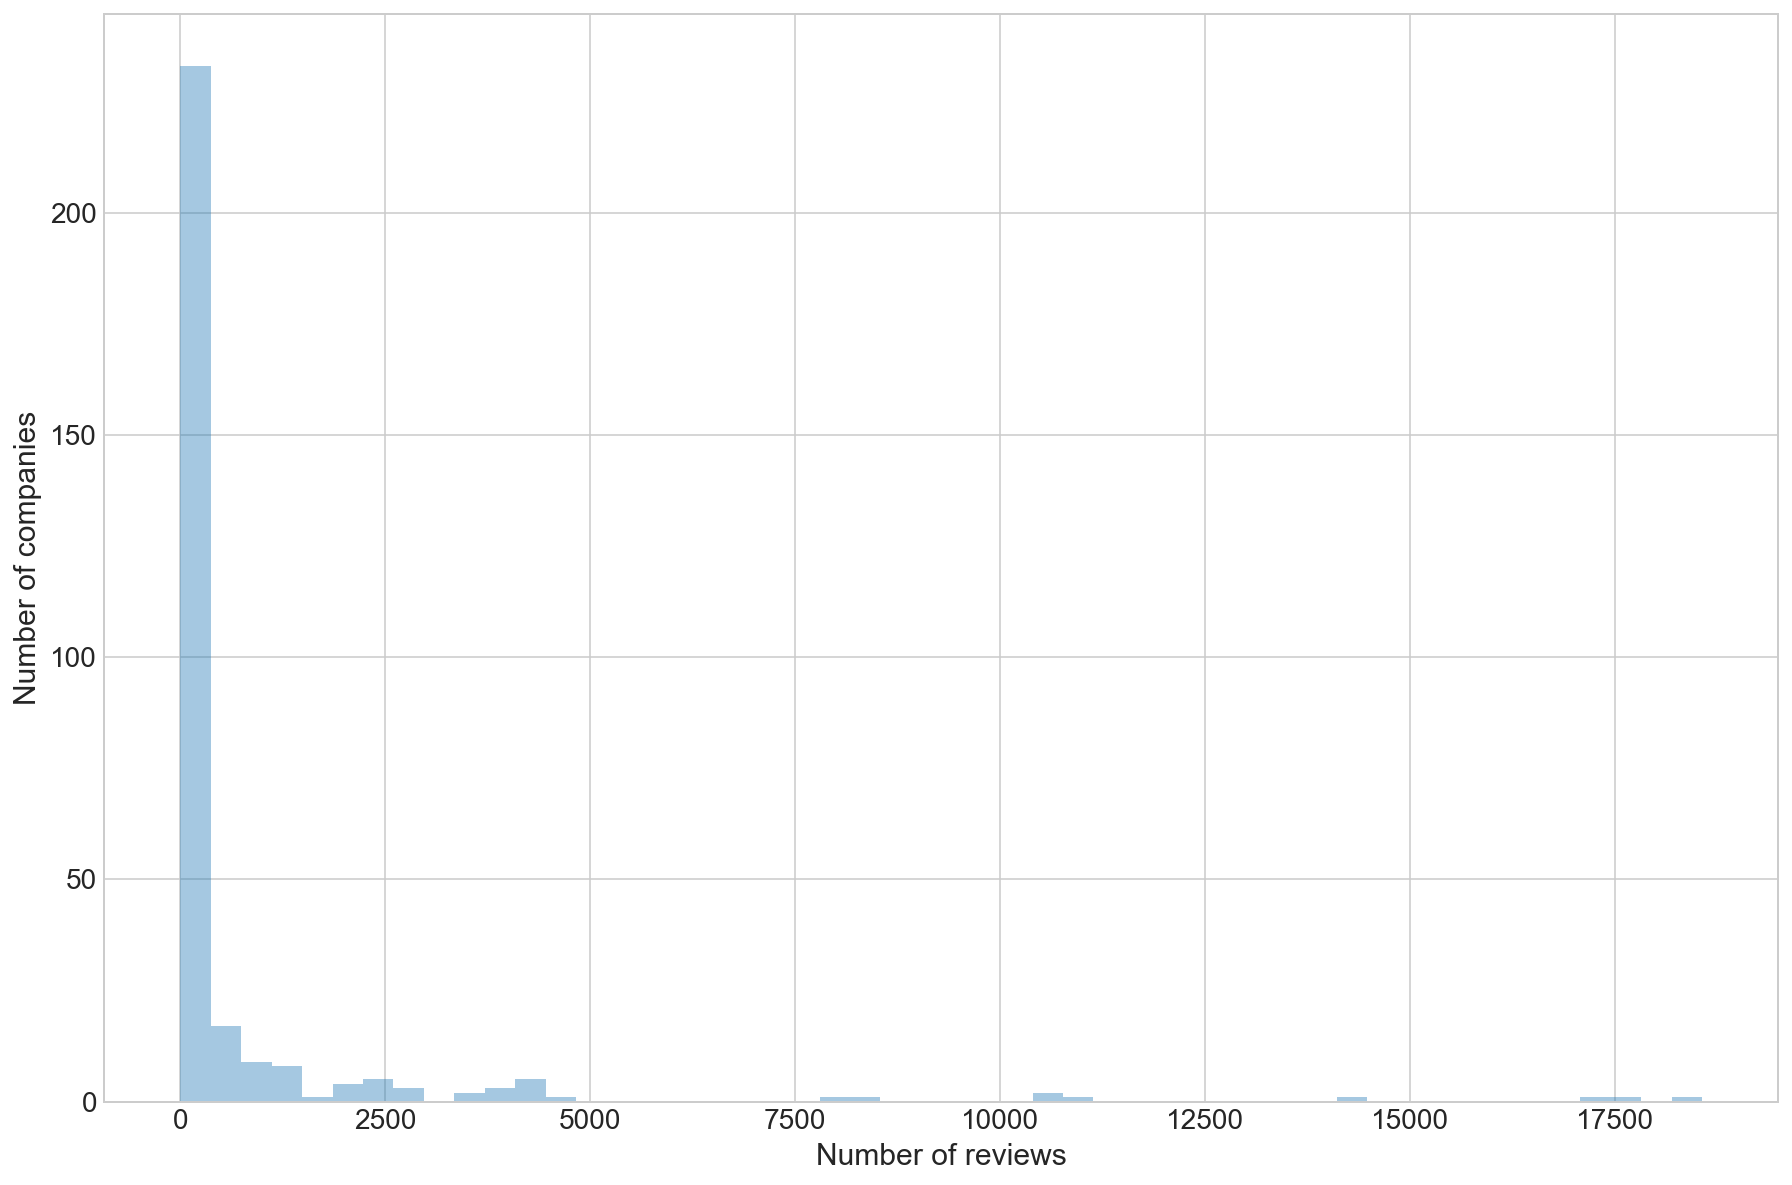

In [435]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df_coys['reviews'], kde = False)
ax.tick_params(labelsize=14)
ax.set_ylabel('Number of companies', fontsize = 15)
ax.set_xlabel('Number of reviews', fontsize = 15)

It appears that there are a large amount of companies with fewer than 100 reviews and there are a number of highly reviewed companies (i.e. above 10,000 reviews). I will leave this column as it is.

Data cleaning decisions, by column:

* url (this was initially scraped to obtain the full job posting information; which has been scraped but I will only import this data if the model struggles) - **remove**
* data_id - **retain** (in case it needs to be used to join any removed scraped job information)
* title - **retain**
* company - **remove**
* lower_salary & upper_salary - **remove** - I have decided to use the mid_point salary as the indicator
* mid_salary - **retain** and rename as "salary"
* star - **retain** since this may provide a strength index of the employer. I'll change these ratings into a smaller scale (since it's currently in a range of 27 to 60).
* reviews - **retain** since this may provide a popularity index of the employer / potential indicator of size.
* city & zipcode  - **remove** there are a lot of unique values in these two fields and I think the location / area will be better extracted from the 'Area' field
* state - **remove** since it is entirely NY
* area - **retain** and clean by removing the word 'area'. Also, since there are a lot of Null values, simply insert 'NYC' for these
* location - **remove** since it appears that the area field has better captured the locations (based on higher values for the non-generic New York location)
* exp_level - **retain**
* des_exp - **retain** and rename column to 'desired_experience'.
* shortdesc & shortdesc2 - combine these into one 'description' column

In [436]:
# Code to combine the description columns

df_raw['description'] = df_raw['shortdesc'] + df_raw['shortdesc2']

# Code to remove columns as mentioned above. Create new dataframe to store this data.

df = df_raw[['data_id','title','mid_salary','star','reviews','area','exp_level','des_exp','description']].copy()

In [437]:
df.columns

Index([u'data_id', u'title', u'mid_salary', u'star', u'reviews', u'area',
       u'exp_level', u'des_exp', u'description'],
      dtype='object')

In [438]:
# Change star scale by dividing by 5 and rounding up
df['star'] = df['star'].map(lambda x: math.ceil(x/5))

In [439]:
df['star'].value_counts()

11.0000    1266
9.0000      560
12.0000      65
8.0000       19
6.0000        8
7.0000        2
Name: star, dtype: int64

In [440]:
df = df.rename(columns={'mid_salary': 'salary'})
df = df.rename(columns={'des_exp': 'desired_experience'})

In [441]:
print(df.shape)
df.drop_duplicates()
print(df.shape)

(2286, 9)
(2286, 9)


In [442]:
df.columns

Index([u'data_id', u'title', u'salary', u'star', u'reviews', u'area',
       u'exp_level', u'desired_experience', u'description'],
      dtype='object')

## EDA to attempt to identify factors that may influence salary

Median salary: 85000.0


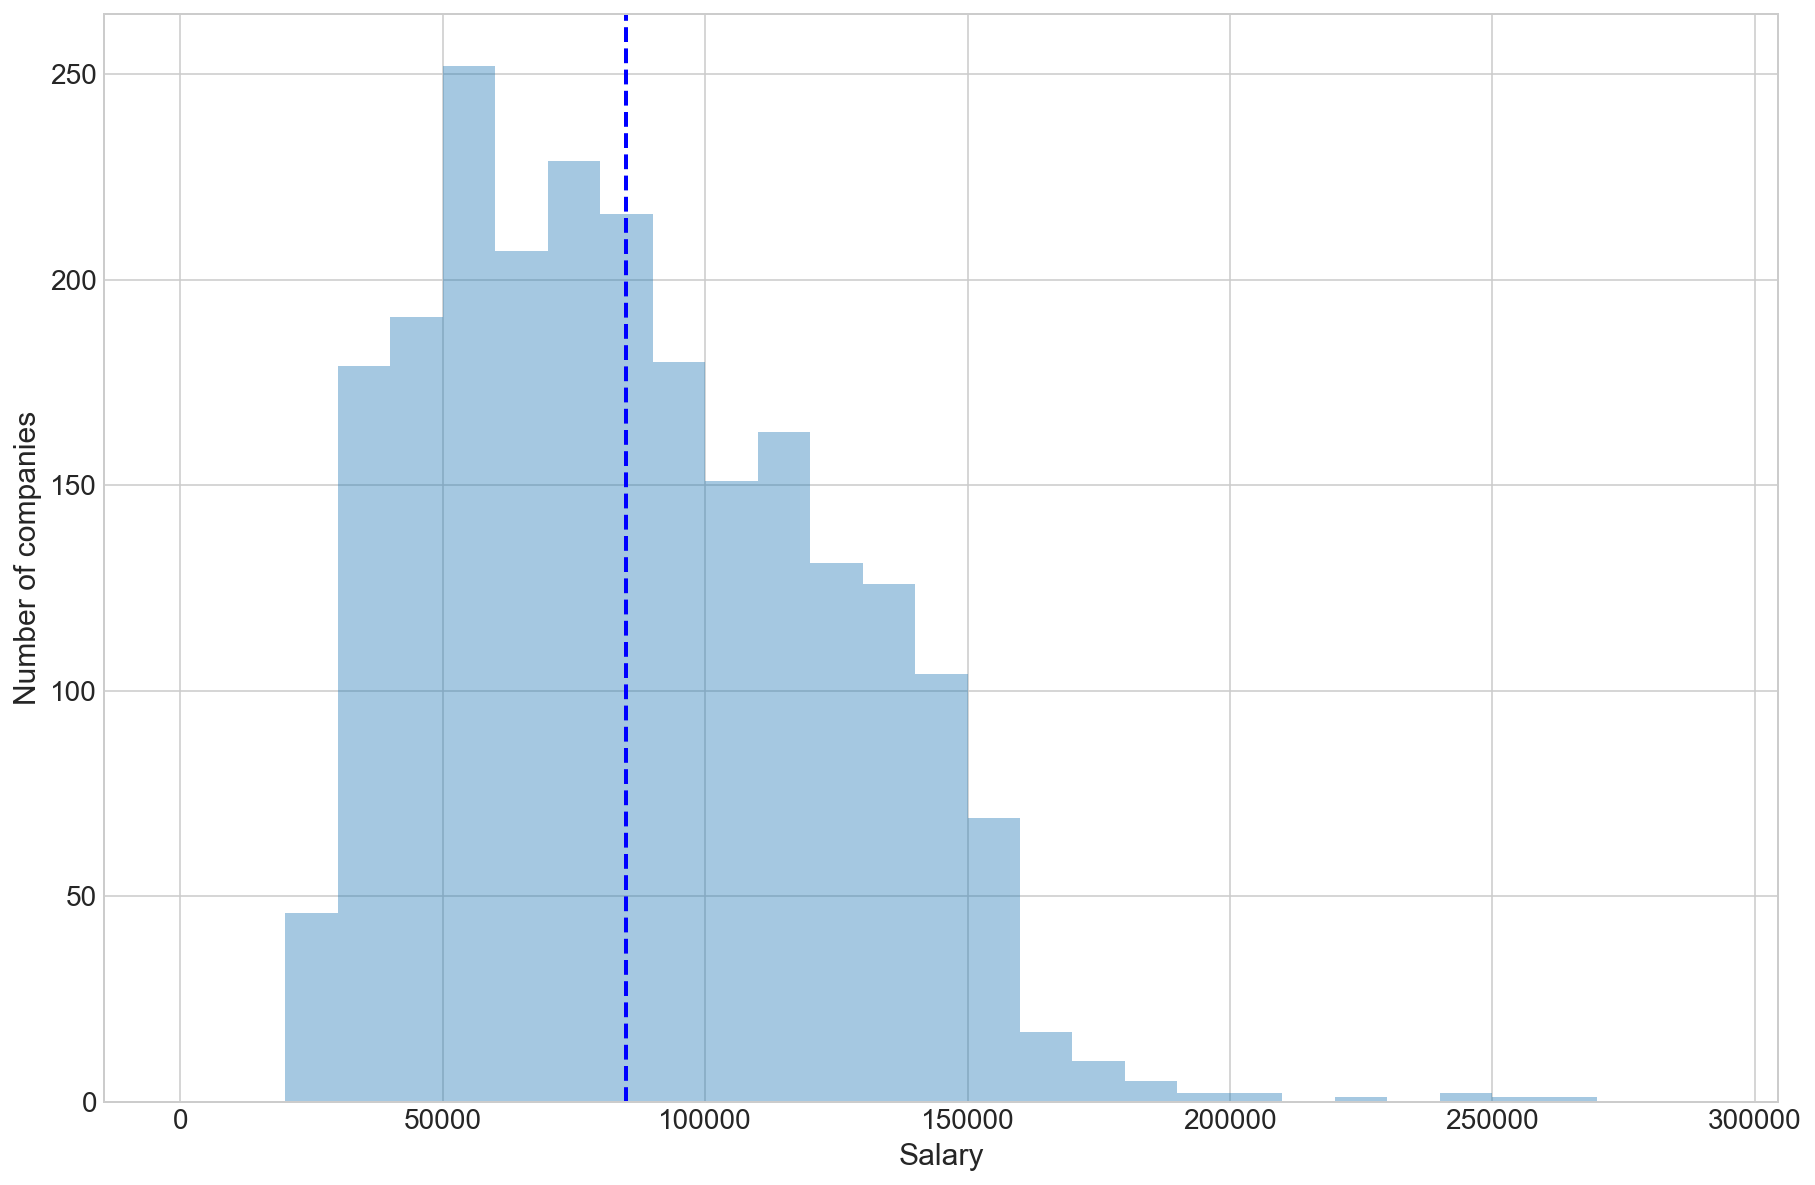

In [443]:
# Calculate median salary to plot
median_salary_v1 = df['salary'].median()

# Histogram to review distribution of salaries
plt.figure(figsize=(15,10))
ax = sns.distplot(df['salary'], kde=False, bins = np.arange(0,300000,10000))
ax.tick_params(labelsize=14)
ax.set_ylabel('Number of companies', fontsize = 15)
ax.set_xlabel('Salary', fontsize = 15)
plt.axvline(median_salary_v1, color='b', linestyle='dashed', linewidth=2)
print("Median salary: {}".format(median_salary_v1))

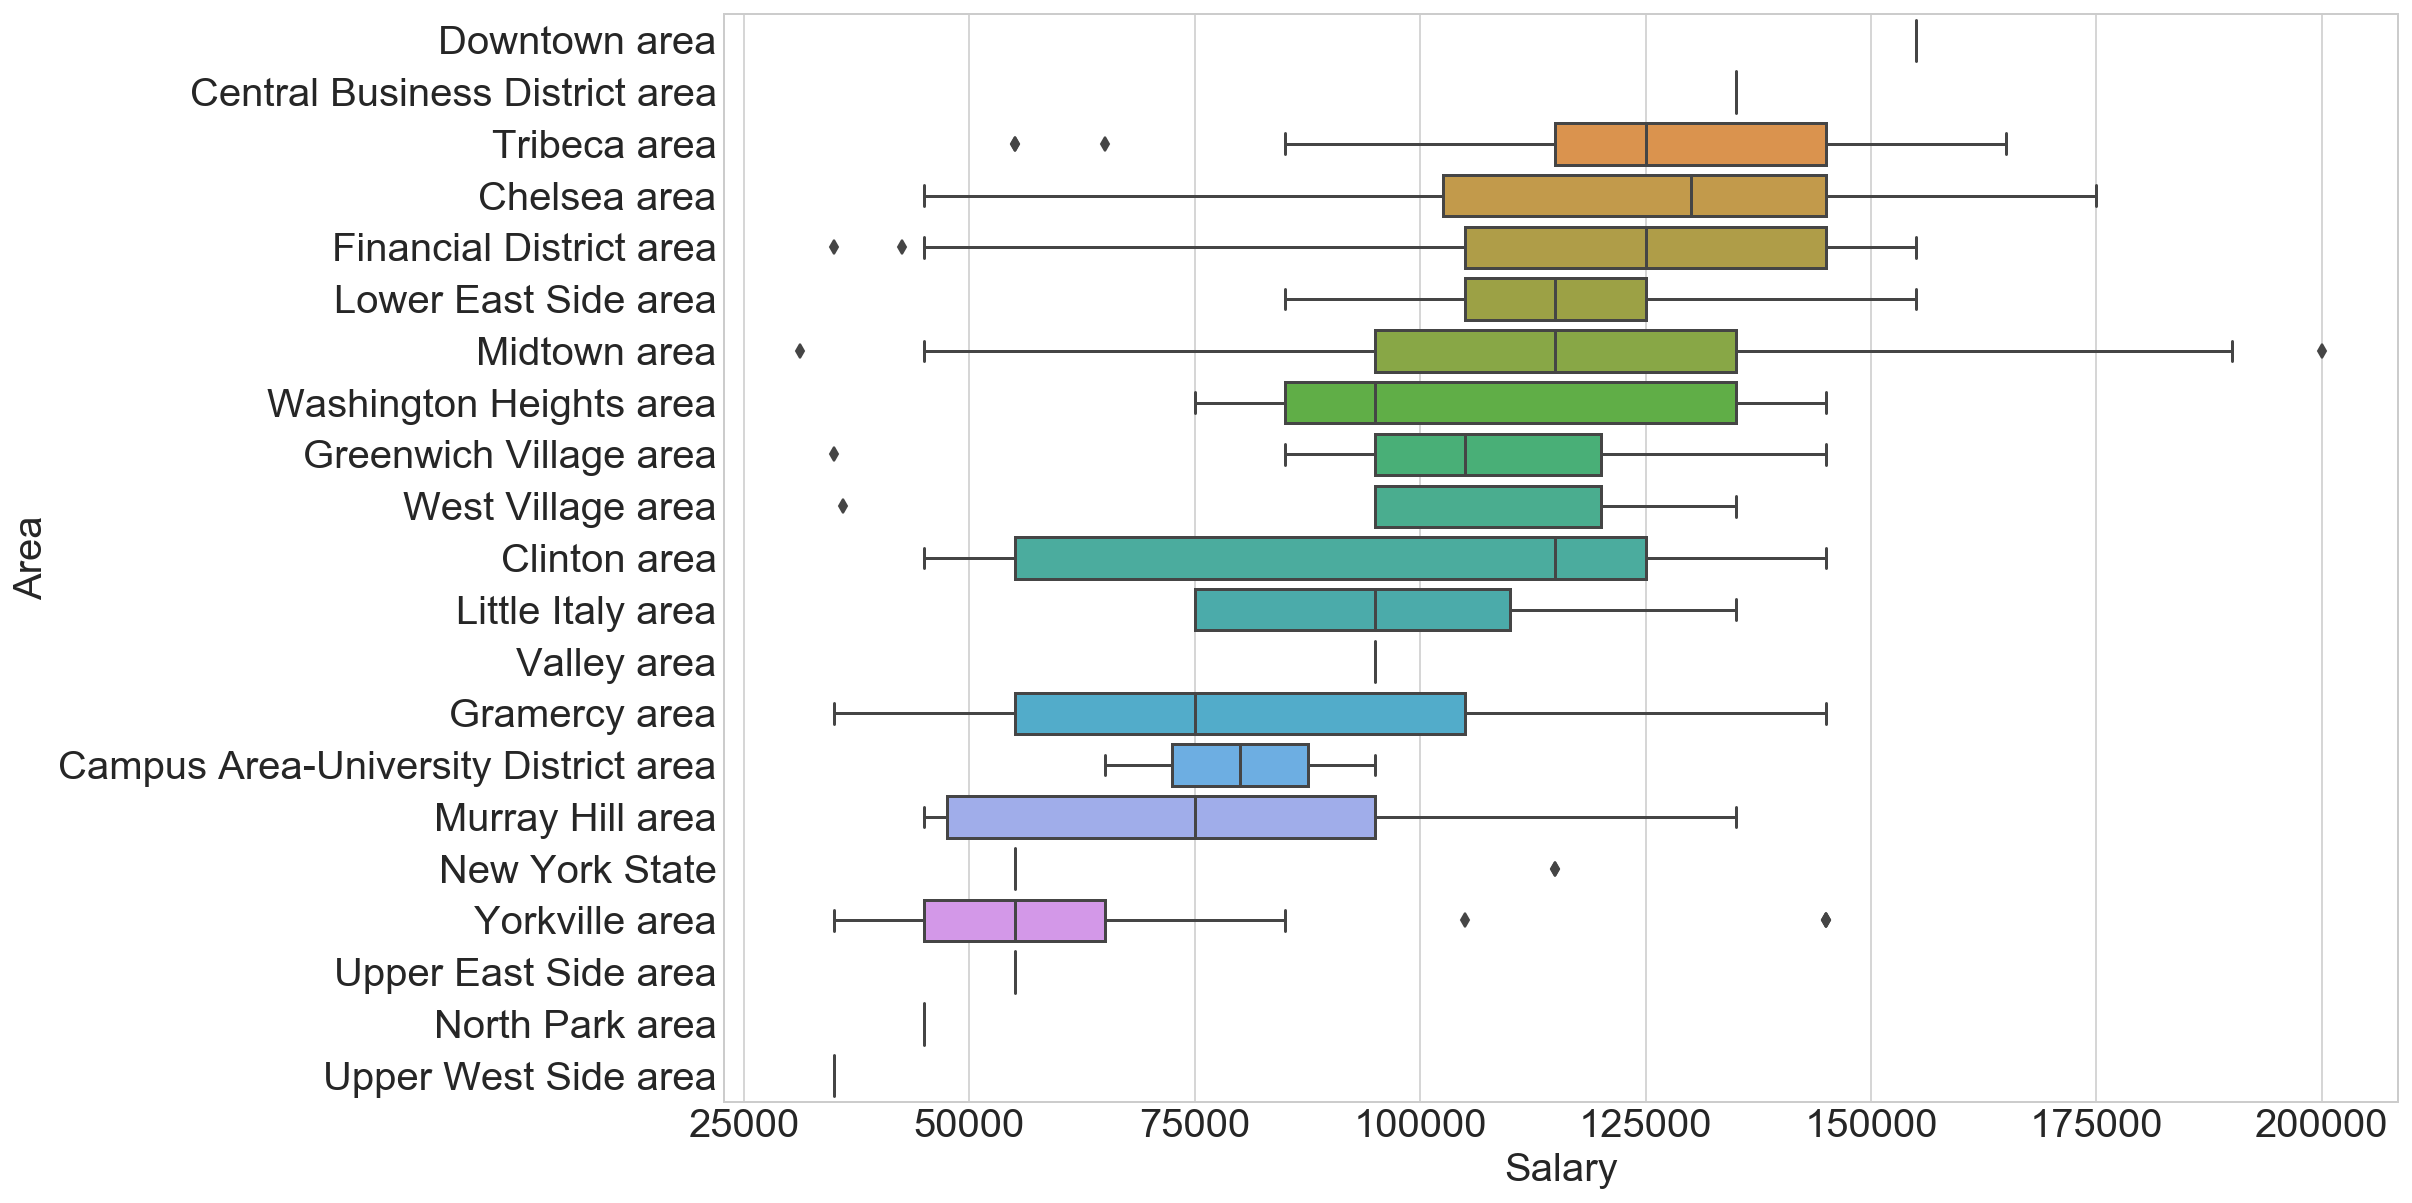

In [444]:
# Box plot area variables

xy = df.groupby(['area']).salary.mean()
xy_df = pd.DataFrame(xy)
xy_df = xy_df.sort_values(by = 'salary', ascending= False)


plt.figure(figsize=(15,10))
ax = sns.boxplot(x="salary", y='area', data=df, order = xy_df.index)
ax.set_ylabel('Area', fontsize = 20)
ax.set_xlabel('Salary', fontsize = 20)
ax.tick_params(labelsize=20)
plt.show()

**It appears that there is a difference on salary by location**

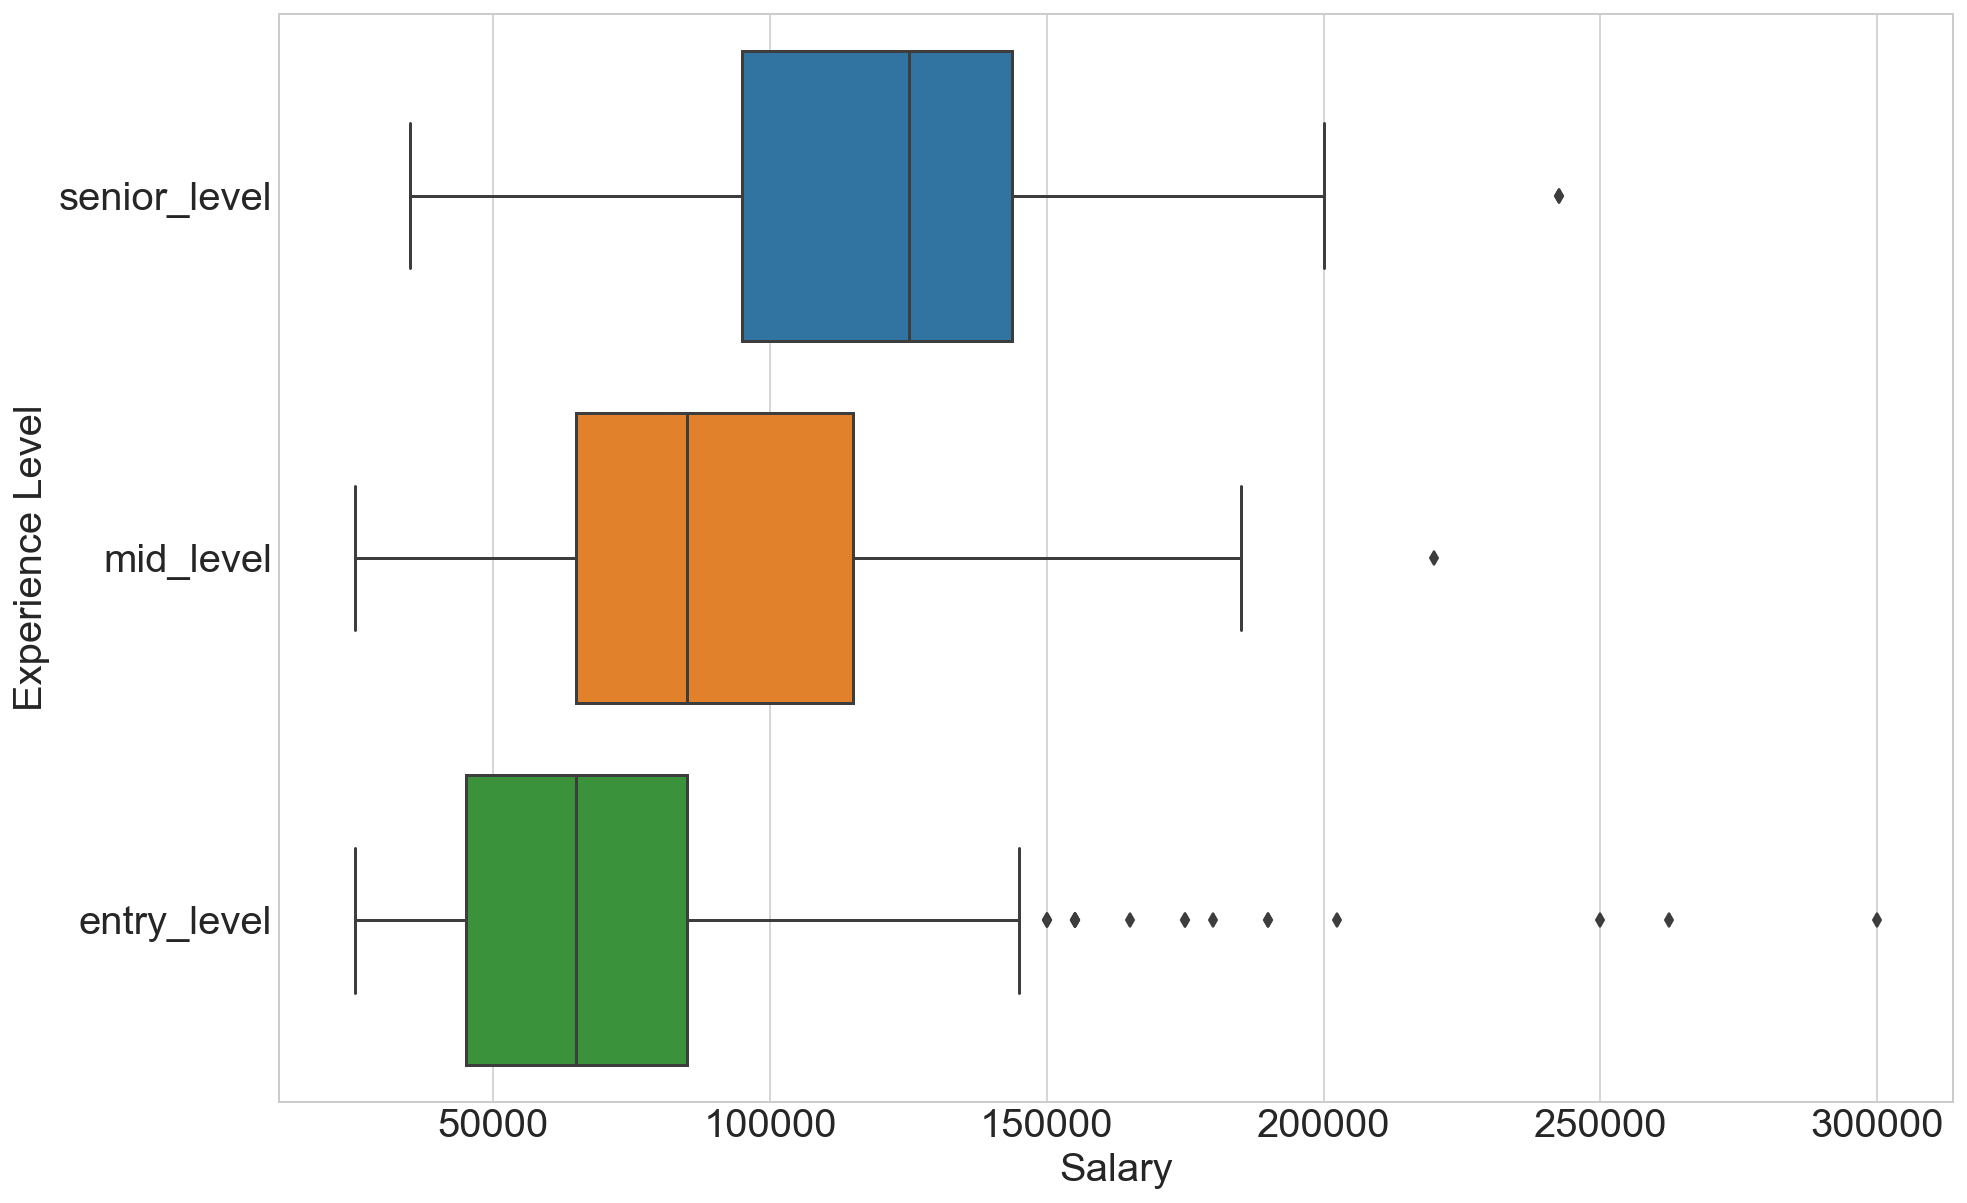

In [445]:
# Box plot experience level variables

plt.figure(figsize=(15,10))
ax = sns.boxplot(x="salary", y='exp_level', data=df, order = ['senior_level','mid_level','entry_level'])
ax.set_ylabel('Experience Level', fontsize = 20)
ax.set_xlabel('Salary', fontsize = 20)
ax.tick_params(labelsize=20)
plt.show()

**It appears that there is a difference on salary based on experience level**

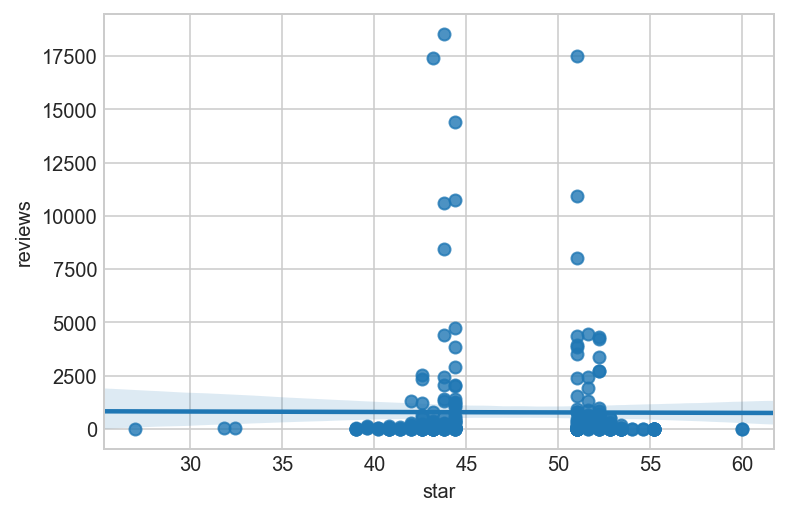

In [446]:
# Scatter plot unique company values

ax = sns.regplot(x="star", y="reviews", data=df_coys)

<p style="color:purple; font-size:14px; font-weight:bold">This indicates that the profile of a company (i.e. reviews) may not necessarily be related to star value</p>

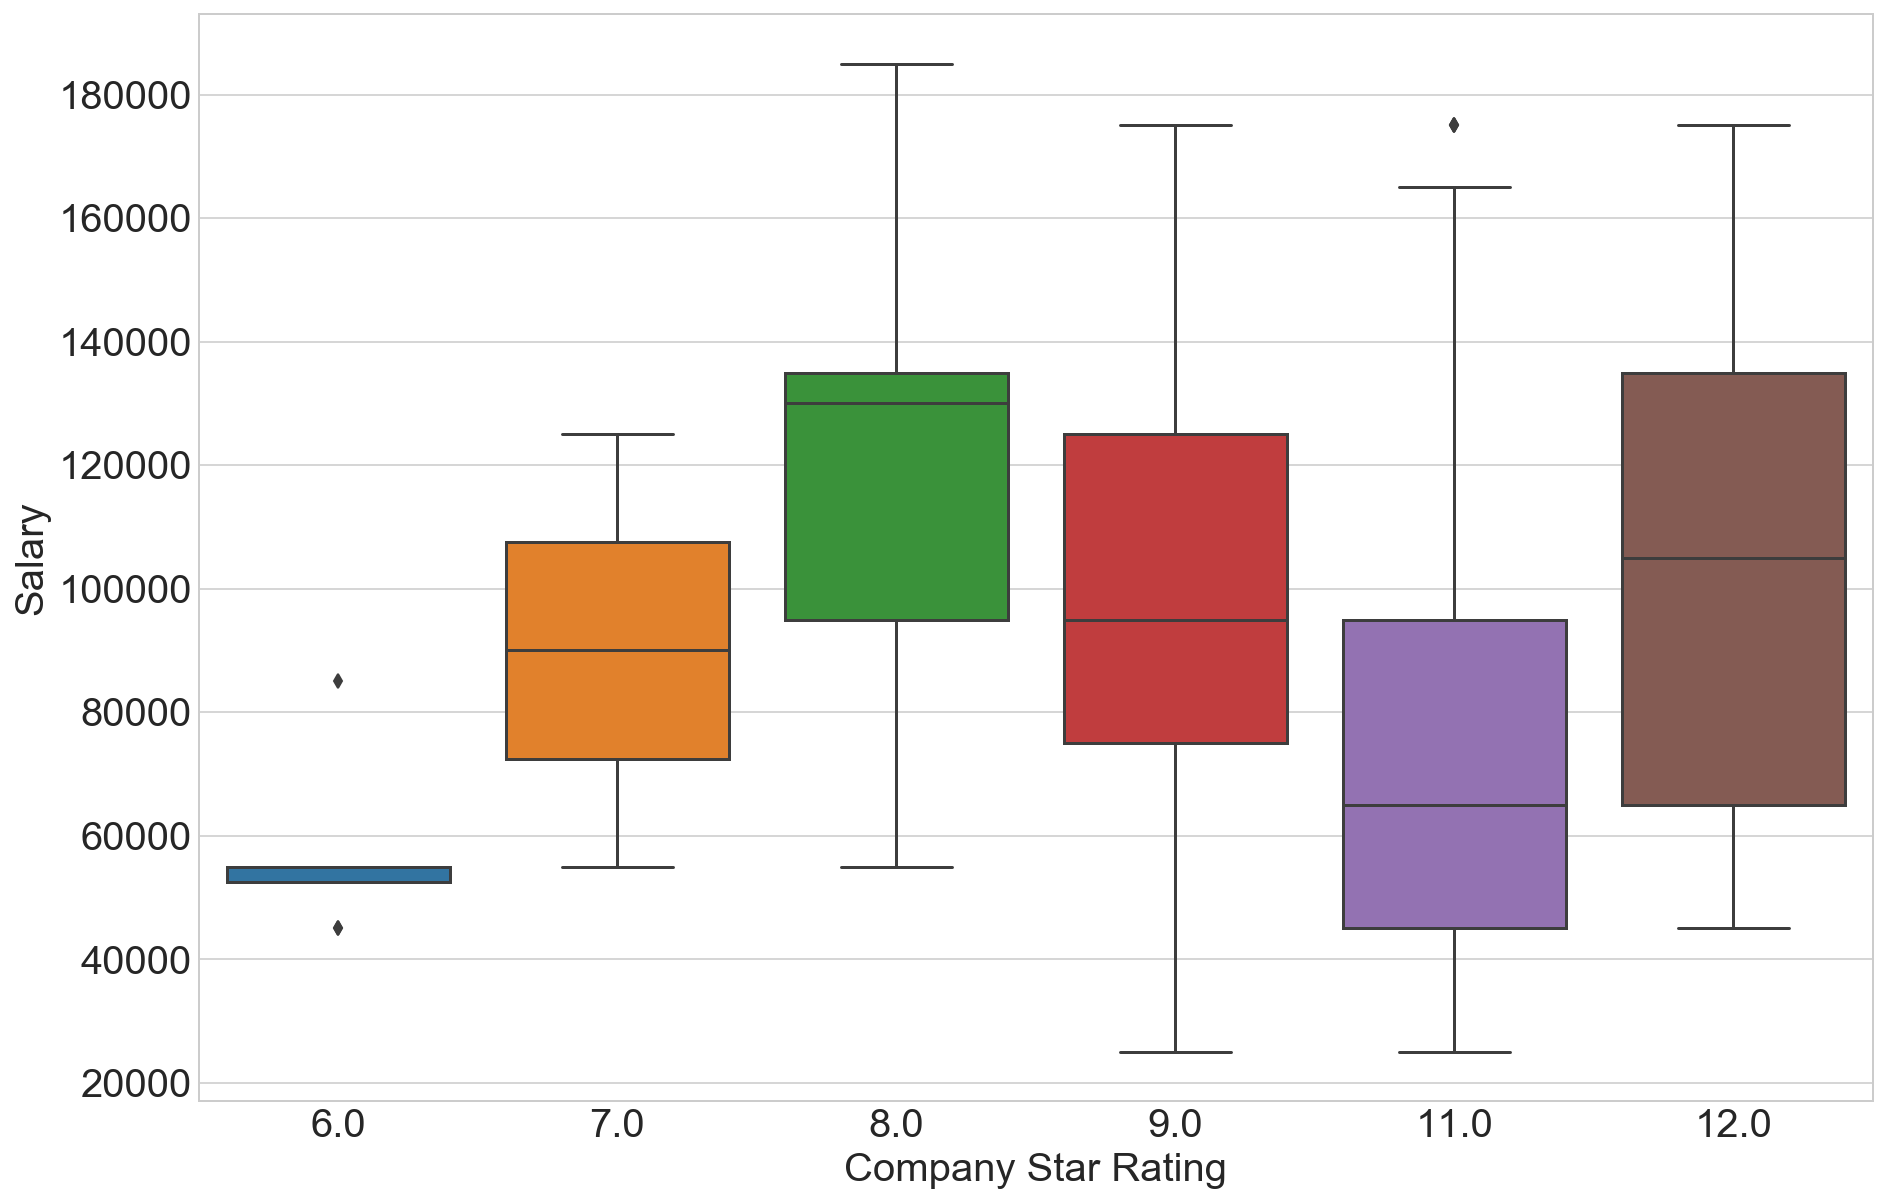

In [447]:
# Box plot star rating vs salary
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="star", y="salary", data=df)
ax.set_ylabel('Salary', fontsize = 20)
ax.set_xlabel('Company Star Rating', fontsize = 20)
ax.tick_params(labelsize=20)

<p style="color:purple; font-size:14px; font-weight:bold">This indicates that the star rating of a company (i.e. reviews) may not necessarily be related to salary amounts.</p>

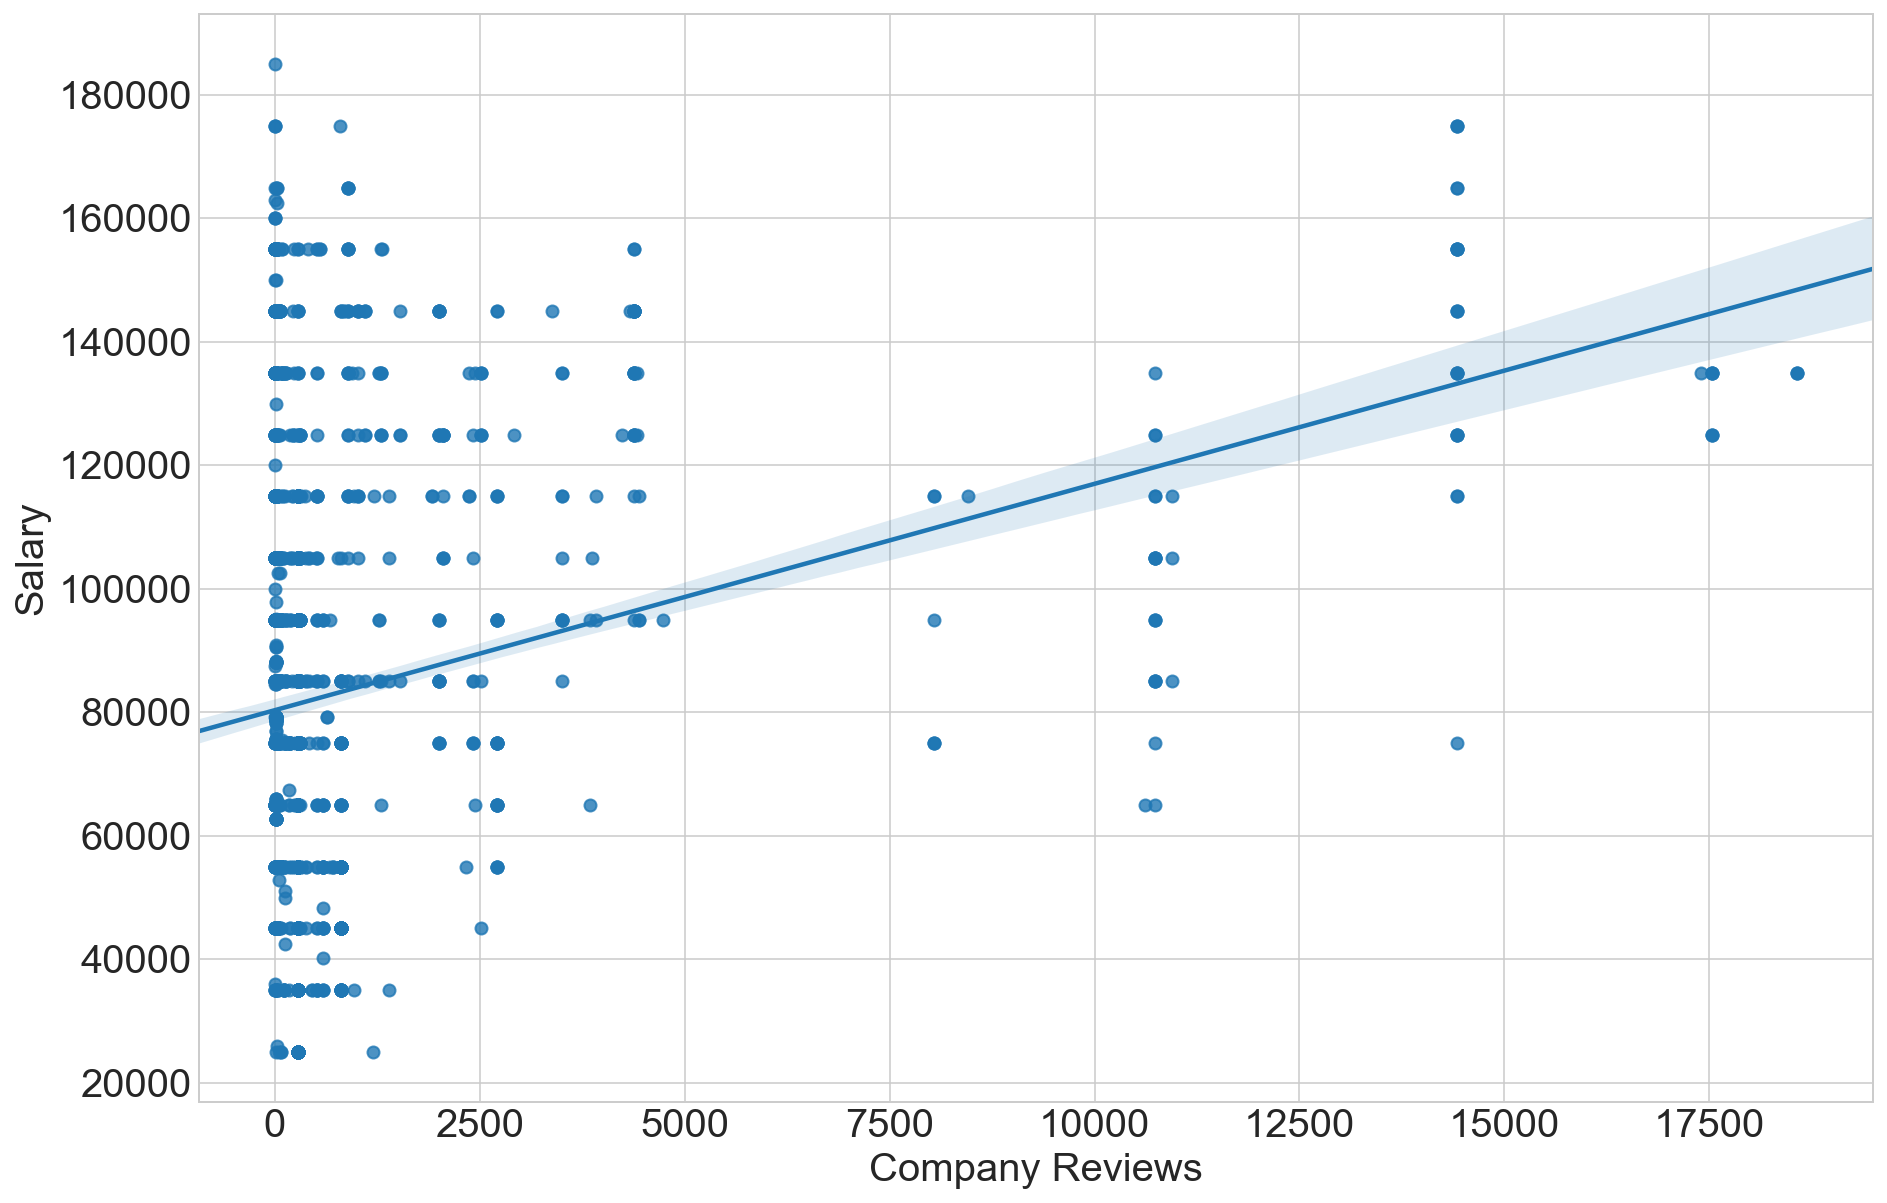

In [448]:
# Scatter plot unique company values
plt.figure(figsize=(15,10))
ax = sns.regplot(x="reviews", y="salary", data=df)
ax.set_ylabel('Salary', fontsize = 20)
ax.set_xlabel('Company Reviews', fontsize = 20)
ax.tick_params(labelsize=20)

<p style="color:purple; font-size:14px; font-weight:bold">It appears that companies that have been reviewed more have higher salaries</p>

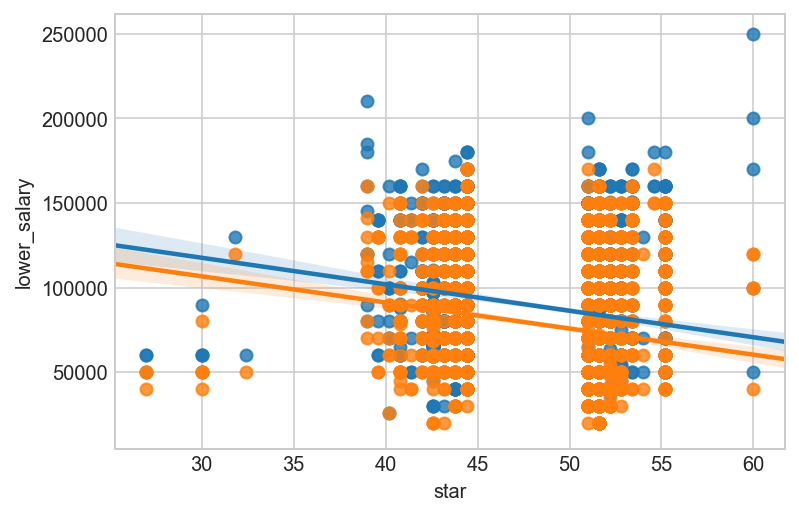

In [449]:
# Scatter plot unique company values

ax = sns.regplot(x="star", y="upper_salary", data=df_raw)

ax = sns.regplot(x="star", y="lower_salary", data=df_raw)

<p style="color:purple; font-size:14px; font-weight:bold">It appears that the star rating may not have an impact on salary levels - as indicated by the previous box plot chart.</p>

### Create dummy variable columns

In [450]:
# Dummy variable the area and experience level columns

dummy_variables = ['area','exp_level']

# Create loop to create columns for dummy variables 

for variable in dummy_variables:
    # Get Dummy variables for colname and store in new dataframe
    dummies = pd.get_dummies(df[variable], prefix = variable, prefix_sep = '_', drop_first = True)

    # Join new dataframe on existing dataframe
    df = pd.concat([df, dummies], axis=1)

    # Drop existing column from dataframe
    df.drop(variable, axis = 1, inplace = True)

In [451]:
# Replace NaN values in Star & Review columns with the unique company medians

star_median = df_coys['star'].median()
reviews_median = df_coys['reviews'].median()

df['star'].fillna(value=star_median, inplace = True)

df['reviews'].fillna(value=reviews_median, inplace = True)

In [452]:
df.columns

Index([u'data_id', u'title', u'salary', u'star', u'reviews',
       u'desired_experience', u'description',
       u'area_Central Business District area', u'area_Chelsea area',
       u'area_Clinton area', u'area_Downtown area',
       u'area_Financial District area', u'area_Gramercy area',
       u'area_Greenwich Village area', u'area_Little Italy area',
       u'area_Lower East Side area', u'area_Midtown area',
       u'area_Murray Hill area', u'area_New York State',
       u'area_North Park area', u'area_Tribeca area',
       u'area_Upper East Side area', u'area_Upper West Side area',
       u'area_Valley area', u'area_Washington Heights area',
       u'area_West Village area', u'area_Yorkville area',
       u'exp_level_mid_level', u'exp_level_senior_level'],
      dtype='object')

### Analyse the text in the title, "desired experience" and description

In [453]:
# Replace NaN values so tfid vectorizer can be used

df['desired_experience'].fillna(value="Unavailable", inplace = True)
df['description'].fillna(value="Unavailable", inplace = True)

In [454]:
# initiate stop words to exclude from count vectorizer
custom_stop_words = list(ENGLISH_STOP_WORDS)


In [455]:
# Code to find out the most common desired experience terms
vect_title = TfidfVectorizer(ngram_range=(1,3), max_features=150, stop_words=custom_stop_words)

# Pulls all of the desired experience terms into one giant string
title_terms = "".join(df['title'])

ngrams_title = vect_title.build_analyzer()(title_terms)

Counter(ngrams_title).most_common(150)

[(u'research', 292),
 (u'data', 260),
 (u'scientist', 186),
 (u'analyst', 183),
 (u'manager', 104),
 (u'amp', 89),
 (u'associate', 80),
 (u'engineer', 79),
 (u'nurse', 74),
 (u'practitioner', 74),
 (u'learning', 70),
 (u'quantitative', 66),
 (u'u2013', 62),
 (u'machine', 60),
 (u'scientistdata', 58),
 (u'coordinator', 54),
 (u'assistant', 52),
 (u'bureau', 50),
 (u'care', 45),
 (u'data scientist', 45),
 (u'intake', 44),
 (u'product', 44),
 (u'sec', 43),
 (u'time', 43),
 (u'new', 43),
 (u'ii', 42),
 (u'sched', 42),
 (u'intake sched', 42),
 (u'analytics', 41),
 (u'center', 41),
 (u'science', 40),
 (u'sec intake', 40),
 (u'software', 39),
 (u'health', 39),
 (u'sec intake sched', 39),
 (u'machine learning', 37),
 (u'technician', 37),
 (u'director', 37),
 (u'cancer', 36),
 (u'senior', 36),
 (u'clinical', 35),
 (u'research analyst', 35),
 (u'oncology', 33),
 (u'nurse practitioner', 32),
 (u'analystdata', 31),
 (u'fgp', 31),
 (u'management', 30),
 (u'medical', 30),
 (u'researcher', 30),
 (u's

In [456]:
X_title = vect_title.fit_transform(df['title'])

# Create distince columns names for titles
title_cols = []
for x in vect_title.get_feature_names():
     title_cols.append('T_'+x)

df_title = pd.DataFrame(X_title.todense(), columns=title_cols)

vect_title.get_feature_names()

[u'34th',
 u'35',
 u'37',
 u'administrative',
 u'aids',
 u'amp',
 u'analysis',
 u'analyst',
 u'analyst bureau',
 u'analyst u2013',
 u'analytics',
 u'assistant',
 u'associate',
 u'associate research',
 u'associate researcher',
 u'bureau',
 u'business',
 u'business analyst',
 u'cancer',
 u'cancer center',
 u'care',
 u'center',
 u'clinical',
 u'clinical research',
 u'clinical research coordinator',
 u'consultant',
 u'coordinator',
 u'data',
 u'data analysis',
 u'data analyst',
 u'data engineer',
 u'data science',
 u'data scientist',
 u'days',
 u'department',
 u'developer',
 u'development',
 u'diem',
 u'director',
 u'doctoral',
 u'engineer',
 u'engineering',
 u'environmental',
 u'equity',
 u'equity research',
 u'fellow',
 u'fgp',
 u'fgp sec',
 u'fgp sec intake',
 u'financial',
 u'financial analyst',
 u'global',
 u'health',
 u'hiv',
 u'hiv aids',
 u'ii',
 u'institute',
 u'intake',
 u'intake sched',
 u'intern',
 u'investment',
 u'lab',
 u'lead',
 u'learning',
 u'learning engineer',
 u'machin

In [457]:
# Code to find out the most common desired experience terms
vect_exp = TfidfVectorizer(ngram_range=(1,3), max_features=50, stop_words=custom_stop_words)

# Pulls all of the desired experience terms into one giant string
experience_terms = "".join(df['desired_experience'])
ngrams_experience = vect_exp.build_analyzer()(experience_terms)

Counter(ngrams_experience).most_common(20)

[(u'data', 430),
 (u'learning', 273),
 (u'java', 143),
 (u'big', 131),
 (u'machine', 129),
 (u'big data', 123),
 (u'hadoop', 118),
 (u'machine learning', 116),
 (u'science', 103),
 (u'data science', 99),
 (u'spark', 95),
 (u'mining', 91),
 (u'processing', 86),
 (u'sas', 85),
 (u'python', 84),
 (u'learning big', 78),
 (u'language', 78),
 (u'language processing', 75),
 (u'learning big data', 75),
 (u'natural language', 73)]

In [458]:
# Code to create a vector matrix of these terms and create a dataframe to store these results
X_experience = vect_exp.fit_transform(df['desired_experience'])

# Create distince columns names for desired experience options
exp_cols = []
for x in vect_exp.get_feature_names():
     exp_cols.append('EXP_'+x)

df_vector_experience = pd.DataFrame(X_experience.todense(), columns=exp_cols)

In [459]:
vect_exp.get_feature_names()

[u'agile',
 u'ai',
 u'aws',
 u'bi',
 u'big',
 u'big data',
 u'data',
 u'data mining',
 u'data science',
 u'data science python',
 u'data warehouse',
 u'hadoop',
 u'hadoop scala',
 u'hive',
 u'java',
 u'javascript',
 u'language',
 u'language processing',
 u'learning',
 u'learning big',
 u'learning big data',
 u'learning data',
 u'learning hadoop',
 u'machine',
 u'machine learning',
 u'machine learning big',
 u'machine learning data',
 u'machine learning hadoop',
 u'matlab',
 u'mining',
 u'mining hadoop',
 u'natural',
 u'natural language',
 u'natural language processing',
 u'oracle',
 u'processing',
 u'python',
 u'python aws',
 u'sas',
 u'scala',
 u'science',
 u'science python',
 u'spark',
 u'spark data',
 u'spark data science',
 u'spss',
 u'sql',
 u'tableau',
 u'unavailable',
 u'warehouse']

In [460]:
# Add the dataframes to the main dataframe

In [461]:
df_total = pd.concat([df, df_vector_experience, df_title], axis =1)

## Create model to predict salary
### 1A - Predict actual salary

#### Step 1: Create a linear regression model function

In [462]:
def regression_model(X_matrix, target, testsize=0.25):

    ''' 
    The coef_in_output is to choose how many variables to display in the co-efficients table.
    This doesn't change the model itself, just what is displayed in the co-efficients dataframe!
    I thought this was useful in case I wanted to 
    '''
    
    # Scale the data using standardisation

    ss = StandardScaler()
    X_s = pd.DataFrame(ss.fit_transform(X_matrix))


    # Create a test train split of the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_s, target, test_size = testsize)

    # Create DataFrame to store regression scores

    reg_score_df= pd.DataFrame(columns = ['Test_name','CV_mean','CV_min','CV_max',
                                          'CV_std','train_r^2_score','test_r^2_score','notes'])

    # Create empty DataFrame to store coefficients

    coef_df = pd.DataFrame(index=range(0,10))

    # Specify training and test matrices for the models

    X1 = X_train
    X2 = X_test
    y1 = y_train
    y2 = y_test

    # Calculate optimal alphas

    ridge_alphas = np.logspace(0, 5, 200)
    optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
    optimal_ridge.fit(X1, y1)

    optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
    optimal_lasso.fit(X1, y1)

    l1_ratios = np.linspace(0.01, 1.0, 25)
    optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10, verbose=1)
    optimal_enet.fit(X1, y1)

    # Create list of different model types to run

    model_types = [LinearRegression(),Ridge(alpha=optimal_ridge.alpha_),Lasso(alpha=optimal_lasso.alpha_),
                   ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)]

    # Create a for loop to run all of the models

    for model_type in model_types:

        # Calculate CV scores and model r^2 scores

        m = model_type
        test_name = str(m)[:str(m).index('(')]
        scores = cross_val_score(m, X1, y1, cv=10)
        CV_mean = scores.mean()
        CV_max = scores.max()
        CV_min = scores.min()
        CV_std = scores.std()
        m.fit(X1, y1)
        train_score = m.score(X1, y1)
        test_score = m.score(X2, y2)
        notes = "no notes"

        # Take results and put into a DataFrame
        reg_score_df.loc[len(reg_score_df)] = [test_name,CV_mean, CV_min, CV_max, CV_std, train_score,
                                               test_score, notes]
        pd.set_option('display.float_format', lambda x: '%.4f' % x)

        # Create co-efficient matrix

        # Review the coefficients 

        coefs = pd.DataFrame({'variable':X_matrix.columns,
                              'coef':m.coef_,
                              'abs_coef':np.abs(m.coef_)})

        # Rename columns
        coefs.columns = ['abs_coef','coef',test_name]

        coefs.sort_values('abs_coef',inplace = True, ascending = False)
        coefs.drop('abs_coef',axis = 1, inplace=True)
        coefs.reset_index(inplace = True, drop=True)
        
        # Re-order absolute co-efficient column and re-order columns (so variable displayed first)
        coefs = coefs[[test_name,'coef']]
        
        coefs.loc[-1] = ['intercept',m.intercept_]  # adding intercept row
        coefs.index = coefs.index + 1  # shifting index
        coefs = coefs.sort_index()  # sorting by index

        coef_df = pd.concat([coef_df, coefs], axis=1)

    # Remove results that don't make sense

    def removelargevalues(value):
        if value > 1000 or value < -1000:
            return np.NaN
        else:
            return value

    for col in reg_score_df.columns[1:]:
        reg_score_df[col] = reg_score_df[col].apply(removelargevalues)

    # Insert note into notes if value converted to np.NaN

    reg_score_df['notes'] = reg_score_df[reg_score_df.columns[1:7]].apply(lambda x: (x.isnull()).sum(), axis=1)
    reg_score_df['notes'] = reg_score_df['notes'].map(lambda x: '{} values out of range'.format(x) if x > 0 else "no notes")

    # Print DataFrame of model results

    return reg_score_df, coef_df

### Model 1.1 A: "Incorporating title & desired experience"

In [463]:
# Create feature matrix and target

# Select column names for predictor matrix
X_features = [x for x in df_total.columns if x not in ['title','data_id','salary',
                                                       'desired_experience','description']]

# Create predictor matrix
X_features = df_total[X_features]

# Create target matrix
y = df_total['salary']

In [464]:
regdf, coefdf = regression_model(X_features, y, 0.25)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [465]:
regdf

,Test_name,CV_mean,CV_min,CV_max,CV_std,train_r^2_score,test_r^2_score,notes
0,LinearRegression,nan,nan,0.6933,nan,0.7274,nan,4 values out of range
1,Ridge,0.6640,0.6095,0.7048,0.0313,0.7254,0.6939,no notes
2,Lasso,0.6651,0.6192,0.7161,0.0317,0.7190,0.6931,no notes
3,ElasticNet,0.6651,0.6184,0.7163,0.0318,0.7197,0.6933,no notes


In [466]:
coefdf

,LinearRegression,coef,Ridge,coef,Lasso,coef,ElasticNet,coef
0,intercept,5253623163071774.0000,intercept,86081.6182,intercept,86115.0529,intercept,86113.5077
1,EXP_language processing,754468857888408832.0000,T_data scientist,5739.5557,T_data scientist,7419.9378,T_data scientist,7443.1006
2,EXP_natural language,-688084804088825088.0000,T_quantitative,5510.7147,T_quantitative,5922.9902,T_quantitative,5943.5701
3,EXP_language,594226567907497088.0000,T_engineer,4690.5529,exp_level_senior_level,5632.8237,exp_level_senior_level,5605.6179
4,T_learning,428380786353835392.0000,exp_level_senior_level,4681.5834,T_engineer,5323.5903,T_engineer,5337.2066
5,EXP_machine learning,-395775698618461952.0000,T_director,4415.2638,T_machine,4882.9265,T_machine,4904.2768
6,EXP_natural language processing,-371724683211075904.0000,T_product,4369.8684,T_product,4748.5387,T_product,4766.6011
7,EXP_data science,-346244903331414016.0000,T_vp,3687.1763,T_director,4543.2105,T_director,4573.5392
8,EXP_natural,-288885938496004992.0000,T_data science,3634.9202,T_data science,4169.8669,T_data science,4201.8912
9,T_hiv aids,-280555945498044992.0000,exp_level_mid_level,3354.5585,T_vp,3881.2838,T_vp,3891.4810


<p style="color:purple; font-size:14px; font-weight:bold">Linear Regression model</p>

<p style="color:orange; font-size:14px; font-weight:normal">Poor values suggests that there may be significant multicollinearity in the dataset. Note: I replaced values greater than 1000 with a 'nan' to save space in the table.</p>

<p style="color:blue; font-size:14px; font-weight:bold">Summary</p>

<p style="color:orange; font-size:14px; font-weight:normal">The Ridge model appears to be the best performing model.</p>

### Model 1.1 B
#### "Incorporating Title, Desired Experience, Short Description (stemmed)"

In [467]:
# Code to incorporate the wording used in the short description

In [468]:
# Since there is a large amount of similar words, I'm going to use a stemmer to consolidate the wording

stemmer = PorterStemmer()

# Tokenize the description data (i.e. turn into single words)
df['description_TOKENIZED'] = df['description'].apply(lambda x : filter(None,x.split(" ")))

# Apply stemmer to the words
df['description_stemmed'] = df['description_TOKENIZED'].apply(lambda x : [stemmer.stem(y) for y in x])

# To get back the words into sentence format to be used by the vectorizer
df['description_stemmed_sentence'] = df['description_stemmed'].apply(lambda x : " ".join(x))

# Drop the columns no longer needed
df.drop(['description_TOKENIZED','description_stemmed'], axis =1)

,data_id,title,salary,star,reviews,desired_experience,description,area_Central Business District area,area_Chelsea area,area_Clinton area,...,area_Tribeca area,area_Upper East Side area,area_Upper West Side area,area_Valley area,area_Washington Heights area,area_West Village area,area_Yorkville area,exp_level_mid_level,exp_level_senior_level,description_stemmed_sentence
0,6830bd28b60c63d0,Student Intern,25000.0000,11.0000,282.0000,Unavailable,To help the staff with T&E reimbursement reque...,0,0,0,...,0,0,0,0,0,0,0,0,0,"To help the staff with t&e reimburs requests, ..."
1,cc8f2b0ec374da10,Student Intern,25000.0000,11.0000,282.0000,Unavailable,To help the staff with T&E reimbursement reque...,0,0,0,...,0,0,0,0,0,0,0,0,0,"To help the staff with t&e reimburs requests, ..."
2,3dfb4887e44cfd40,Social Media Intern,25000.0000,11.0000,8.0000,Unavailable,We have offices in 19 cities around the world ...,0,0,0,...,0,0,0,0,0,0,0,0,0,We have offic in 19 citi around the world and ...
3,afdc861fe72af549,Ultimate Hoops Statistician,25000.0000,9.0000,1197.0000,Unavailable,Experience tracking statistical data for baske...,0,0,0,...,0,0,0,0,0,0,0,0,0,experi track statist data for basketbal games....
4,1f32ad046f016d4a,FGP Office Assistant - Per Diem Weekends,25000.0000,11.0000,282.0000,Unavailable,Basic computer skills using Microsoft applicat...,0,0,0,...,0,0,0,0,0,0,0,0,0,basic comput skill use microsoft applic - abil...
5,38ff6b6546af18a0,FGP Sec I-Intake/Sched (37.5),25000.0000,11.0000,282.0000,Unavailable,Logs in materials with respect to time and dat...,0,0,0,...,0,0,0,0,0,0,0,0,0,log in materi with respect to time and data wh...
6,38ecd07800df4966,FGP Sec I-Intake/Sched (37.5),25000.0000,11.0000,40.0000,Unavailable,Logs in materials with respect to time and dat...,0,0,0,...,0,0,0,0,0,0,0,0,0,log in materi with respect to time and data wh...
7,c76c60d23bd2d678,FGP Sec I-Intake/Sched (40),25000.0000,11.0000,282.0000,Unavailable,Logs in materials with respect to time and dat...,0,0,0,...,0,0,0,0,0,0,0,0,0,log in materi with respect to time and data wh...
8,c76c60d23bd2d678,FGP Sec I-Intake/Sched (40),25000.0000,11.0000,282.0000,Unavailable,Logs in materials with respect to time and dat...,0,0,0,...,0,0,0,0,0,0,0,0,0,log in materi with respect to time and data wh...
9,d47ccf70f1276b76,FGP Sec I-Intake/Sched (40),25000.0000,11.0000,40.0000,Unavailable,Logs in materials with respect to time and dat...,0,0,0,...,0,0,0,0,0,0,0,0,0,log in materi with respect to time and data wh...


In [470]:
# Code to find out the most common desired experience terms
vect_desc_stemmer = TfidfVectorizer(ngram_range=(1,4), max_features=150, stop_words=custom_stop_words)

# Pulls all of the description terms into one giant string
description_terms_stemmed = "".join(df['description_stemmed_sentence'])

ngrams_description_stemmed = vect_desc_stemmer.build_analyzer()(description_terms_stemmed)

Counter(ngrams_description_stemmed).most_common(20)

[(u'data', 3960),
 (u'scientist', 1019),
 (u'health', 633),
 (u'research', 629),
 (u'clinic', 548),
 (u'team', 508),
 (u'scientists', 489),
 (u'nyu', 463),
 (u'work', 416),
 (u'data scientist', 402),
 (u'manag', 361),
 (u'school', 352),
 (u'develop', 333),
 (u'analyz', 332),
 (u'patient', 315),
 (u'data scientists', 311),
 (u'train', 311),
 (u'cancer', 309),
 (u'ha', 308),
 (u'medic', 302)]

In [471]:
# Code to create a vector matrix of these terms and create a dataframe to store these results
X_description_stemmed = vect_desc_stemmer.fit_transform(df['description_stemmed_sentence'])

# Create distince columns names for desired experience options
desc_cols_stems = []
for x in vect_desc_stemmer.get_feature_names():
     desc_cols_stems.append('DES_'+x)

df_vector_description_stem = pd.DataFrame(X_description_stemmed.todense(), columns=desc_cols_stems)

In [472]:
vect_desc_stemmer.get_feature_names()[:10]

[u'175',
 u'175 years',
 u'175 years nyu',
 u'175 years nyu school',
 u'1841',
 u'1841 ha',
 u'1841 ha train',
 u'1841 ha train thousand',
 u'analysi',
 u'analysis']

In [473]:
# Add the dataframe to the total dataframe
df_total_v2 = pd.concat([df_total, df_vector_description_stem], axis =1)

In [474]:
# Create new feature matrix

# Select column names for predictor matrix
X_cols_v2 = [x for x in df_total_v2.columns if x not in ['title','data_id','salary',
                                                       'desired_experience','description',
                                                       'description_stemmed_sentence']]

# Create predictor matrix
X_features_v2 = df_total_v2[X_cols_v2]

y_v2 = df_total_v2['salary']

In [475]:
# Create 2nd version of model
regdf_v2, coefdf_v2 = regression_model(X_features_v2, y_v2, 0.25)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [476]:
regdf_v2

,Test_name,CV_mean,CV_min,CV_max,CV_std,train_r^2_score,test_r^2_score,notes
0,LinearRegression,nan,nan,0.7567,nan,0.7810,nan,4 values out of range
1,Ridge,0.6861,0.5902,0.7765,0.0501,0.7646,0.7091,no notes
2,Lasso,0.6836,0.5923,0.7804,0.0541,0.7614,0.7111,no notes
3,ElasticNet,0.6836,0.5922,0.7804,0.0542,0.7615,0.7111,no notes


In [477]:
coefdf_v2

,LinearRegression,coef,Ridge,coef,Lasso,coef,ElasticNet,coef
0,intercept,931253304747.1388,intercept,86522.9631,intercept,86531.9824,intercept,86531.8900
1,T_learning,-2231673576686468.5000,T_director,4120.8217,T_quantitative,5396.7784,T_quantitative,5400.5290
2,EXP_mining,1477705284202951.7500,T_quantitative,4073.9988,T_data scientist,5094.2818,T_data scientist,5095.1686
3,EXP_data,-1434468551684440.0000,T_engineer,3392.4135,T_director,4843.7849,T_director,4845.7972
4,DES_ha train,-1144849183055099.7500,exp_level_senior_level,3385.8188,exp_level_senior_level,4670.9871,exp_level_senior_level,4668.3161
5,T_machine,1109365679554860.1250,T_principal,3380.1027,T_engineer,4599.1173,T_engineer,4600.2971
6,T_machine learning,1096522118853643.3750,T_data scientist,3286.5143,T_principal,3985.7284,T_principal,3987.8803
7,DES_ha train thousand physician,-1052222402091372.8750,T_vp,2716.3362,T_vp,3440.9525,T_vp,3441.6919
8,T_sec intake sched,1047956961552106.7500,DES_data scientist,2656.9699,DES_data scientist,3010.8305,DES_data scientist,3010.1125
9,T_learning engineer,1007460542362778.1250,T_solutions,2514.7216,T_solutions,2933.5439,T_solutions,2934.5320


<p style="color:purple; font-size:14px; font-weight:bold">Linear Regression model</p>

<p style="color:orange; font-size:14px; font-weight:normal">Poor values suggests that there may be significant multicollinearity in the dataset. Note: I replaced values greater than 1000 with a 'nan' to save space in the table.</p>

<p style="color:blue; font-size:14px; font-weight:bold">Summary</p>

<p style="color:orange; font-size:14px; font-weight:normal">The Lasso model appears to be the best performing model.</p>

### Model 1.1 C
#### "Incorporating Title, Desired Experience, Short Description (not stemmed)"

In [481]:
# Code to find out the most common short description terms
vect_desc = TfidfVectorizer(ngram_range=(1,3), max_features=150, stop_words=custom_stop_words)

# Pulls all of the desired experience terms into one giant string
description_terms = "".join(df['description'])

ngrams_desc = vect_desc.build_analyzer()(description_terms)

Counter(ngrams_desc).most_common(20)

[(u'data', 3960),
 (u'scientists', 1145),
 (u'health', 633),
 (u'research', 581),
 (u'clinical', 571),
 (u'data scientists', 499),
 (u'nyu', 463),
 (u'analysis', 413),
 (u'team', 385),
 (u'scientist', 363),
 (u'school', 347),
 (u'engineers', 323),
 (u'medical', 312),
 (u'cancer', 309),
 (u'experience', 295),
 (u'physicians', 283),
 (u'medicine', 276),
 (u'work', 273),
 (u'center', 267),
 (u'shape', 265)]

In [482]:
# Code to create a vector matrix of these terms and create a dataframe to store these results
X_description = vect_desc.fit_transform(df['description'])

# Create distince columns names for desired experience options
desc_cols = []
for x in vect_desc.get_feature_names():
     desc_cols.append('DE_'+x)

df_vector_description = pd.DataFrame(X_description.todense(), columns=desc_cols)

In [483]:
# Add the description dataframe to the total dataframe
df_total_v3 = pd.concat([df_total, df_vector_description], axis =1)

In [484]:
# Create new feature matrix

# Select column names for predictor matrix
X_cols_v3 = [x for x in df_total_v3.columns if x not in ['title','data_id','salary',
                                                       'desired_experience','description',
                                                       'description_stemmed_sentence']]

# Create predictor matrix
X_features_v3 = df_total_v3[X_cols_v3]

y_v3 = df_total_v3['salary']

In [485]:
# Create 2nd version of model
regdf_v3, coefdf_v3 = regression_model(X_features_v3, y_v3, 0.25)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [486]:
regdf_v3

,Test_name,CV_mean,CV_min,CV_max,CV_std,train_r^2_score,test_r^2_score,notes
0,LinearRegression,nan,nan,0.6625,nan,0.7718,nan,4 values out of range
1,Ridge,0.6801,0.6272,0.7280,0.0325,0.7575,0.7239,no notes
2,Lasso,0.6814,0.6304,0.7197,0.0302,0.7552,0.7299,no notes
3,ElasticNet,0.6814,0.6306,0.7197,0.0301,0.7550,0.7299,no notes


In [487]:
coefdf_v3

,LinearRegression,coef,Ridge,coef,Lasso,coef,ElasticNet,coef
0,intercept,-9792289284461.5938,intercept,86362.1921,intercept,86348.2507,intercept,86348.6316
1,DE_trained,-3353963323096693.0000,T_quantitative,4020.9560,T_quantitative,5390.1707,T_quantitative,5386.3203
2,DE_1841 trained thousands,3293988209437621.0000,T_director,3639.3457,T_engineer,4549.7398,T_engineer,4545.3299
3,T_sec,2805158054543389.0000,T_engineer,3525.3244,T_data scientist,4498.4525,exp_level_senior_level,4505.0275
4,DE_committed,-2578196638594603.0000,DE_data scientist,3473.7713,exp_level_senior_level,4498.1659,T_data scientist,4496.4890
5,T_learning,2572318489705786.5000,exp_level_senior_level,3443.8815,T_director,4216.3411,T_director,4210.8041
6,T_fgp sec,2556236316025592.5000,T_product,3330.7887,T_product,4068.1797,T_product,4064.6473
7,T_learning engineer,2278461009549356.0000,T_principal,3052.5777,DE_data scientist,3901.0524,DE_data scientist,3896.5320
8,T_machine learning engineer,-2234846187183940.5000,T_data scientist,2900.7124,T_principal,3452.4054,T_principal,3447.7024
9,EXP_data,-2186593759735013.0000,T_lead,2514.7863,T_machine,2879.3240,T_machine,2905.4834


### Model 1.2 B - predicting high vs low salary (above average vs below average)
#### "Incorporating Title, Desired Experience, Short Description (stemmed)"

In [488]:
# Insert column into the dataframe which assesses whether the salary is below average or above average

# Code to calculate average salary:

mean_salary = df_total_v2['salary'].mean()
median_salary = df_total_v2['salary'].median()

print("Mean salary: {}".format(mean_salary))
print("Median salary: {}".format(median_salary))

Mean salary: 86332.2498688
Median salary: 85000.0


In [489]:
# Since the mean and median salaries are close, I will use the median salary as the mid-point

# Code to insert a column for above average salary (whereby above average = 1)
def highsalary(value):
    if value >= median_salary:
        return 1
    else:
        return 0

df_total_v2['high_salary'] = df_total_v2['salary'].apply(highsalary)

In [490]:
df_total_v2['high_salary'].sum()

1176L

### Random Forests model

In [629]:
# I will use the X_features_v2 predictor matrix already created in 1.1 B

# Target will be the high salary column

# Split dataset into train and test dataset (stratifying on whether it is high salary)

train_x, test_x, train_y, test_y = train_test_split(X_features_v2, df_total_v2['high_salary'], random_state=26,
                                                        train_size=0.75, stratify = df_total_v2['high_salary'] )

print "Train_x Shape :: ", train_x.shape
print "Train_y Shape :: ", train_y.shape
print "Test_x Shape :: ", test_x.shape
print "Test_y Shape :: ", test_y.shape

Train_x Shape ::  (1714, 374)
Train_y Shape ::  (1714,)
Test_x Shape ::  (572, 374)
Test_y Shape ::  (572,)


In [630]:
clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=26)
trained_model = clf.fit(train_x, train_y)

In [631]:
trained_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=26,
            verbose=0, warm_start=False)

In [632]:
predictions = trained_model.predict(test_x)
yhat_pp = clf.predict_proba(test_x)  ## used for roc curve

In [633]:
# Sample test of predictions:
for i in xrange(0, 5):
        print "Actual outcome: {} and Predicted outcome: {}".format(list(test_y)[i], predictions[i])

Actual outcome: 1 and Predicted outcome: 1
Actual outcome: 1 and Predicted outcome: 1
Actual outcome: 1 and Predicted outcome: 1
Actual outcome: 1 and Predicted outcome: 0
Actual outcome: 1 and Predicted outcome: 1


In [634]:
print "Train Accuracy: ", accuracy_score(train_y, trained_model.predict(train_x))
print "Test Accuracy: ", accuracy_score(test_y, predictions)

Train Accuracy:  0.998833138856
Test Accuracy:  0.907342657343


In [635]:
# Insert predictions into the dataframe

df_total_v2['high_salary_prediction'] = trained_model.predict(X_features_v2)

In [636]:
# Create confusion matrix (in a dataframe)



conmat = np.array(confusion_matrix(test_y, predictions, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['high_salary', 'low_salary'],
                         columns=['predicted_high','predicted_low'])
confusion

,predicted_high,predicted_low
high_salary,269,25
low_salary,28,250


In [637]:
# Identify the most important features

rf_feature_importance_table = pd.DataFrame({
        'feature':X_features_v2.columns,
        'importance':trained_model.feature_importances_
    })

rf_feature_importance_table.sort_values('importance', ascending=False, inplace=True)
rf_feature_importance_table[0:10]

,feature,importance
1,reviews,0.0350
23,exp_level_senior_level,0.0319
114,T_engineer,0.0268
30,EXP_data,0.0211
177,T_research,0.0205
22,exp_level_mid_level,0.0201
270,DES_health,0.0176
257,DES_data scientist,0.0167
101,T_data,0.0165
106,T_data scientist,0.0161


# BONUS QUESTION (addressed here)

My boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. **i.e. In the previously prepared confusion matrix, my boss would rather a higher amount than 30 - which means decreasing the false positives and increasing the false negatives)**

In [640]:
# Initiate new RandomForest model with different parameters to try to get more false negatives than false positives
train_x, test_x, train_y, test_y = train_test_split(X_features_v2, df_total_v2['high_salary'], random_state=26,
                                                        train_size=0.75, stratify = df_total_v2['high_salary'] )

clf_bonus = RandomForestClassifier(n_estimators=10, max_features= 10, criterion='entropy',random_state=26)
trained_model_bonus = clf_bonus.fit(train_x, train_y)
predictions_bonus = trained_model_bonus.predict(test_x)

yhat_pp_bonus = clf_bonus.predict_proba(test_x)

conmat = np.array(confusion_matrix(test_y, predictions_bonus, labels=[1,0]))

confusion_bonus = pd.DataFrame(conmat, index=['high_salary', 'low_salary'],
                         columns=['predicted_high','predicted_low'])
confusion_bonus

,predicted_high,predicted_low
high_salary,264,30
low_salary,24,254


In [639]:
confusion

,predicted_high,predicted_low
high_salary,269,25
low_salary,28,250


**As evidenced in the above tables, the 'confusion bonus' matrix has different parameters which has resulted in a higher amount of incorrect low salaries than incorrect high salaries**

## Plot ROC curve comparing these two models

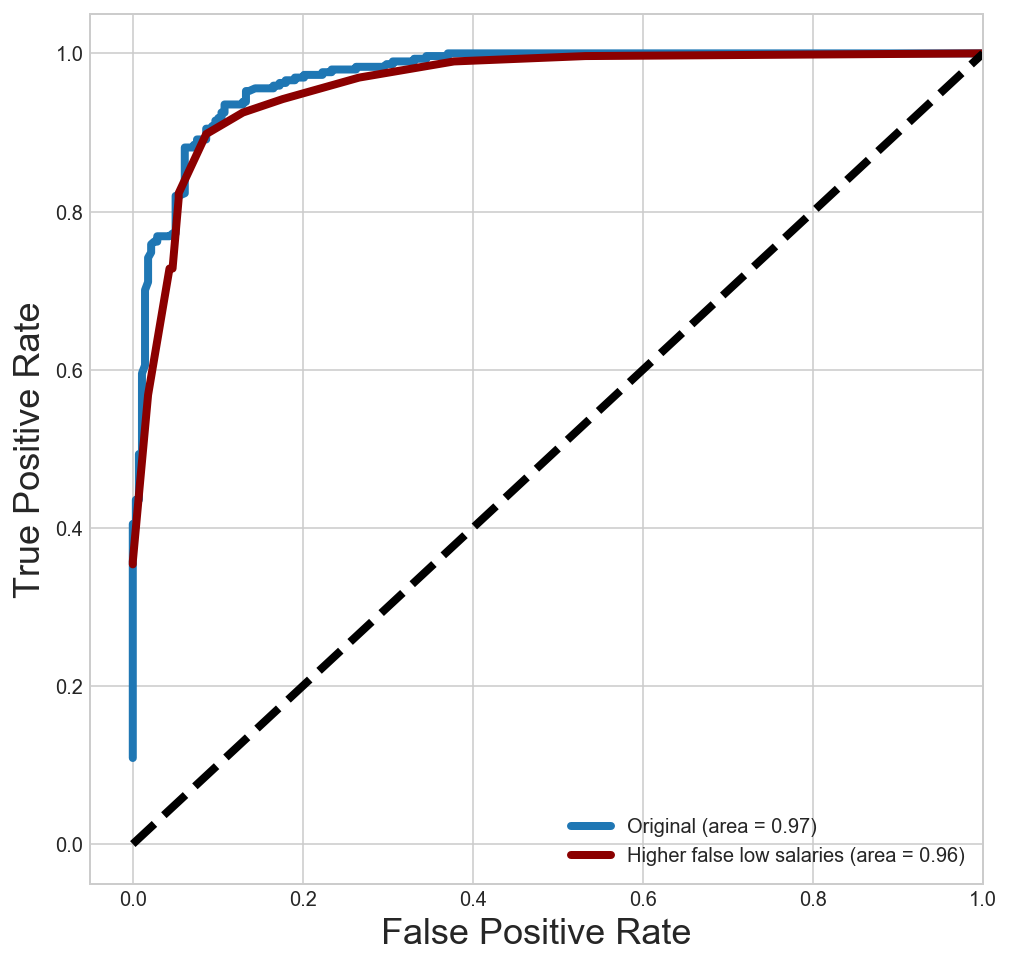

In [643]:
fpr, tpr, _ = roc_curve(test_y, yhat_pp[:,1])
roc_auc = auc(fpr, tpr)

fpr_bonus, tpr_bonus, _ = roc_curve(test_y, yhat_pp_bonus[:,1])
roc_auc_bonus = auc(fpr_bonus, tpr_bonus)

plt.figure(figsize=[8,8])

plt.plot(fpr, tpr, label='Original (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot(fpr_bonus, tpr_bonus, label='Higher false low salaries (area = %0.2f)' % roc_auc_bonus, 
         linewidth=4, color='darkred')

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.legend(loc="lower right")
plt.show()

**This ROC curve demonstrates that with the second model (red) we have been able to decrease the false positive rate**

## Create model to understand factors that distinguish job category
### 2A - Predict whether a job title includes "Data Scientist"

In [500]:
# Insert a column in the Data Frame which assesses whether the title includes "Data Scientist"

# Create a fresh copy of the DataFrame for this

Q2_df = df_total_v2.copy()

Q2_df['Data_Scientist'] = Q2_df['title'].map(lambda x: 1 if "data scientist" in x.lower() else 0)

Q2_df[Q2_df['Data_Scientist'] == 1].shape

(230, 381)

### Create a classification model to predict "Data Scientist" roles using a "Decision Tree"

In [273]:
# Set up the predictor matrix and the target

colnames = [x for x in Q2_df.columns if x not in ['title','data_id','level',
                                            'desired_experience','description',
                                            'description_stemmed_sentence','Data_Scientist',title_cols]]

colnames = [x for x in colnames if x not in title_cols]

X_2A = Q2_df[colnames].copy()

target_2A = Q2_df['Data_Scientist']

In [314]:
Q2A_colnames = X_2A.columns.tolist()

['salary',
 'star',
 'reviews',
 'area_Central Business District area',
 'area_Chelsea area',
 'area_Clinton area',
 'area_Downtown area',
 'area_Financial District area',
 'area_Gramercy area',
 'area_Greenwich Village area',
 'area_Little Italy area',
 'area_Lower East Side area',
 'area_Midtown area',
 'area_Murray Hill area',
 'area_New York State',
 'area_North Park area',
 'area_Tribeca area',
 'area_Upper East Side area',
 'area_Upper West Side area',
 'area_Valley area',
 'area_Washington Heights area',
 'area_West Village area',
 'area_Yorkville area',
 'exp_level_mid_level',
 'exp_level_senior_level',
 'EXP_agile',
 'EXP_big',
 'EXP_big data',
 'EXP_data',
 'EXP_data mining',
 'EXP_data science',
 'EXP_data science python',
 'EXP_hadoop',
 'EXP_java',
 'EXP_language',
 'EXP_language processing',
 'EXP_learning',
 'EXP_learning big',
 'EXP_learning big data',
 'EXP_machine',
 'EXP_machine learning',
 'EXP_machine learning big',
 'EXP_matlab',
 'EXP_mining',
 'EXP_natural',
 'E

#### Initiate a GridSearch to find the best Decision Tree Classifier

In [276]:
# Select a number of parameters for the Decision Tree to try

decision_tree_params = {
    'max_depth':[None,1,2,3,4],
    'max_features':[None,'log2','sqrt',2,3,4,5],
    'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
}

In [277]:
# Initiate decision tree grid search
decision_tree_grid_search = GridSearchCV(DecisionTreeClassifier(), decision_tree_params, cv=5, verbose=1)

In [278]:
# Fit the decision tree to the prediction data and the target
decision_tree_grid_search.fit(X_2A, target_2A)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=1)]: Done 1925 out of 1925 | elapsed:   19.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [None, 1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [503]:
# Find the best parameters for the decision tree

decision_tree_best = decision_tree_grid_search.best_estimator_
print("Best model parameters: {}".format(decision_tree_grid_search.best_params_))
print("Best model score: {}".format(decision_tree_grid_search.best_score_))

Best model parameters: {'max_features': 4, 'min_samples_split': 3, 'max_depth': 2}
Best model score: 0.905511811024


In [516]:
# Identify the most important features
feature_importance_table = pd.DataFrame({
        'feature':X_2A.columns,
        'importance':decision_tree_best.feature_importances_
    })

feature_importance_table.sort_values('importance', ascending=False, inplace=True)
feature_importance_table[0:5]

,feature,importance
37,EXP_learning big,0.5723
53,EXP_spark,0.3691
122,DES_research,0.0586
0,salary,0.0000
110,DES_nyu school,0.0000


#### Visualise the Decision Tree classifier

In [517]:
# Initiate a Decision Tree with the best parameters as identified above
dtr = DecisionTreeClassifier(max_features=4, min_samples_split=3, max_depth=2)

In [518]:
dtr.fit(X_2A, target_2A)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [519]:
dtr_scores = cross_val_score(dtr, X_2A, target_2A, cv=5)
print dtr_scores, np.mean(dtr_scores)

[ 0.89956332  0.89934354  0.89934354  0.89934354  0.83369803] 0.886258396797


In [520]:
# Fix column names so visualisation can work

new_col_list = []

for x in Q2A_colnames:
    new_col_list.append(x.encode('utf-8'))

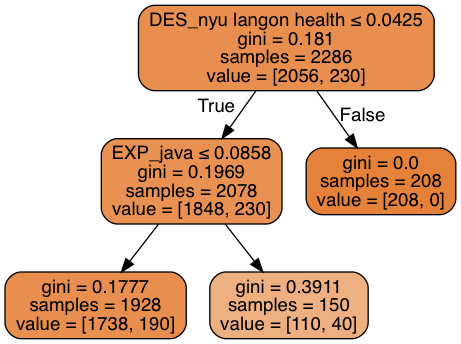

In [521]:
# Initialize the output file object
dot_data = StringIO() 

dot_data = StringIO()  

export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=new_col_list)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

### 2B - Predict whether a job is classified as "Entry Level", "Senior Level" or "Mid Level"

In [522]:
# Insert a column in the Data Frame which assesses whether the job is "Entry Level"
def job_level(row):
    if row['exp_level_mid_level'] == 1:
        value = "mid level"
    elif row['exp_level_senior_level'] == 1:
        value = "senior level"
    else:
        value = "entry level"
    return value

Q2_df['level'] = df.apply(lambda row: job_level(row), axis = 1)

Q2_df['level'].value_counts()

mid level       1145
entry level      890
senior level     251
Name: level, dtype: int64

In [523]:
 # Insert a column in the Data Frame which assesses whether the job is "Entry Level" (number version)
def job_level(row):
    if row['exp_level_mid_level'] == 1:
        value = 2
    elif row['exp_level_senior_level'] == 1:
        value = 3
    else:
        value = 1
    return value

Q2_df['level_value'] = df.apply(lambda row: job_level(row), axis = 1)

Q2_df['level_value'].value_counts()

2    1145
1     890
3     251
Name: level_value, dtype: int64

In [524]:
# Set up level as the target

target_2B = Q2_df['level_value']

In [525]:
# Set up predictor matrix

colnames = [x for x in Q2_df.columns if x not in ['title','data_id','level','exp_level_senior_level',
                                            'desired_experience','description','exp_level_mid_level',
                                            'description_stemmed_sentence','level_value']]
X_2B = Q2_df[colnames].copy()

In [526]:
print(X_2B.shape)
print(target_2B.shape)

(2286, 376)
(2286,)


In [527]:
# calculate the baseline accuracy:
target_2B.value_counts()/target_2B.count()

2   0.5009
1   0.3893
3   0.1098
Name: level_value, dtype: float64

In [528]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_2B, target_2B, random_state=99,
                                                    test_size=0.25, stratify = target_2B)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)

print("Accuracy score of model: {}".format(metrics.accuracy_score(y_test, y_pred_class)))

Q2_df['level_prediction'] = knn.predict(X_2B)

Accuracy score of model: 0.79020979021


In [529]:
# Add prediction to dataframe

Q2_df_matrix = Q2_df.groupby(by = 'level_value').count()[['level']]

level_names = ['entry','mid','senior']
level_values = [1,2,3]
level_combo = zip(level_names,level_values)

for name, value in level_combo:
    list_of_values = []
    for num in Q2_df_matrix.index:
        # Create temporary dataframe which only stores actual level value and predicted level value
        temp_df = Q2_df[ (Q2_df['level_value'] == num) & (Q2_df['level_prediction'] == value)]
        # Append the length of this dataframe as the number of matched results
        list_of_values.append(temp_df.shape[0])
    Q2_df_matrix[name] = list_of_values

Q2_df_matrix

,level,entry,mid,senior
level_value,,,,
1,890,843,38,9
2,1145,40,1087,18
3,251,8,16,227


### Check whether scaling the predictors makes a difference to model performance

In [530]:
# Scale the predictors
Q2_B_ss = StandardScaler()
X_2B_s = Q2_B_ss.fit_transform(X_2B)

In [531]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_2B_s, target_2B, random_state=90,
                                                    test_size=0.25, stratify = target_2B)

# STEP 2: train the model on the training set (using K=1)
knn_s = KNeighborsClassifier(n_neighbors=1)
knn_s.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn_s.predict(X_test)

print("Accuracy score of model: {}".format(metrics.accuracy_score(y_test, y_pred_class)))

Q2_df['level_prediction_s'] = knn_s.predict(X_2B_s)

Accuracy score of model: 0.741258741259


In [532]:
# Add prediction to dataframe

Q2_df_matrix_s = Q2_df.groupby(by = 'level_value').count()[['level']]

level_names = ['entry','mid','senior']
level_values = [1,2,3]
level_combo = zip(level_names,level_values)

for name, value in level_combo:
    list_of_values = []
    for num in Q2_df_matrix_s.index:
        # Create temporary dataframe which only stores actual level value and predicted level value
        temp_df = Q2_df[ (Q2_df['level_value'] == num) & (Q2_df['level_prediction_s'] == value)]
        # Append the length of this dataframe as the number of matched results
        list_of_values.append(temp_df.shape[0])
    Q2_df_matrix_s[name] = list_of_values

Q2_df_matrix_s

,level,entry,mid,senior
level_value,,,,
1,890,831,57,2
2,1145,56,1080,9
3,251,11,19,221


The standardisation of values did not improve model performance

### It's difficult to determine what the most important features are, so implement a feature selection method

In [534]:
# Build a SelectK best selector, assessing both F classif and chi
skb_f = SelectKBest(f_classif, k=5)
skb_chi2 = SelectKBest(chi2, k=5)

# train the selector on our data
skb_f.fit(X_2B, target_2B)
skb_chi2.fit(X_2B, target_2B)

# examine results
kbest = pd.DataFrame([X_2B.columns, list(skb_f.scores_), list(skb_chi2.scores_)], 
                     index=['feature','f_classif','chi2 score']).T.sort_values('chi2 score', ascending=False)
kbest[0:20]

,feature,f_classif,chi2 score
0,salary,223.7755,5986659.8094
2,reviews,2.6380,37251.8648
375,level_prediction,5280.3960,462.1521
194,T_senior,374.1277,261.8031
373,high_salary,195.9108,162.5985
204,T_sr,147.2849,151.0533
1,star,3.8281,75.4244
111,T_director,57.3428,73.8165
342,DES_senior,78.0010,62.1489
196,T_senior data scientist,47.0499,48.3543


In [542]:
# Based on the top 100 features from Chi2 - re-run the K Nearest Neighbours model

# Set up level as the target

target_2B = Q2_df['level_value']

# Set up predictor matrix

colnames_new = [x for x in kbest[0:100]['feature']]
                                
X_2B_new = Q2_df[colnames_new].copy()

In [544]:
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X_2B_new, target_2B, random_state=99,
                                                    test_size=0.25, stratify = target_2B)

# STEP 2: train the model on the training set (using K=1)
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn3.predict(X_test)

print("Accuracy score of model: {}".format(metrics.accuracy_score(y_test, y_pred_class)))

Q2_df['level_prediction_new'] = knn3.predict(X_2B_new)

Accuracy score of model: 0.788461538462


In [545]:
# Add prediction to dataframe

Q2_df_matrix_new = Q2_df.groupby(by = 'level_value').count()[['level']]

level_names = ['entry','mid','senior']
level_values = [1,2,3]
level_combo = zip(level_names,level_values)

for name, value in level_combo:
    list_of_values = []
    for num in Q2_df_matrix_new.index:
        # Create temporary dataframe which only stores actual level value and predicted level value
        temp_df = Q2_df[ (Q2_df['level_value'] == num) & (Q2_df['level_prediction_new'] == value)]
        # Append the length of this dataframe as the number of matched results
        list_of_values.append(temp_df.shape[0])
    Q2_df_matrix_new[name] = list_of_values

,level,entry,mid,senior
level_value,,,,
1,890,842,39,9
2,1145,40,1087,18
3,251,8,16,227


In [546]:
# Update index name

Q2_df_matrix_new.index = ['entry level','mid level','senior level']
Q2_df_matrix_new

,level,entry,mid,senior
entry level,890,842,39,9
mid level,1145,40,1087,18
senior level,251,8,16,227
